In [1]:
import sys
from dotenv import load_dotenv
import os
import sys
from pathlib import Path

AVES_ROOT = Path("../aves")
CENSUS_GEO_ROOT = AVES_ROOT / "data" / "external" / "censo_2017" / "geometria"

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 96


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

from aves.config import setup_style

from aves.data import eod
from aves.data.census.loading import read_census_map
from aves.features.utils import normalize_rows

setup_style()

In [3]:
comunas = read_census_map('comuna', path=CENSUS_GEO_ROOT / "R13")

In [5]:
zones = (
    gpd.read_file(AVES_ROOT / "data" / "processed" / "scl_zonas_urbanas.json")
    .set_index("ID")
)
zones.head()


,AREA,Zona,Com,Comuna,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,area_m2,geometry
ID,,,,,,,,,,,,,,,,,
103,837.7500,103.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,4.575649e+05,"POLYGON ((-70.65492 -33.55500, -70.65517 -33.5..."
104,998.8125,104.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.725462e+05,"POLYGON ((-70.67599 -33.55542, -70.67452 -33.5..."
106,286.2500,106.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,2.693838e+06,"POLYGON ((-70.67891 -33.55911, -70.68019 -33.5..."
115,857.4375,115.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.534193e+05,"POLYGON ((-70.67625 -33.55513, -70.67653 -33.5..."
116,853.9375,116.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.184305e+05,"POLYGON ((-70.66564 -33.55260, -70.66309 -33.5..."


<Axes: >

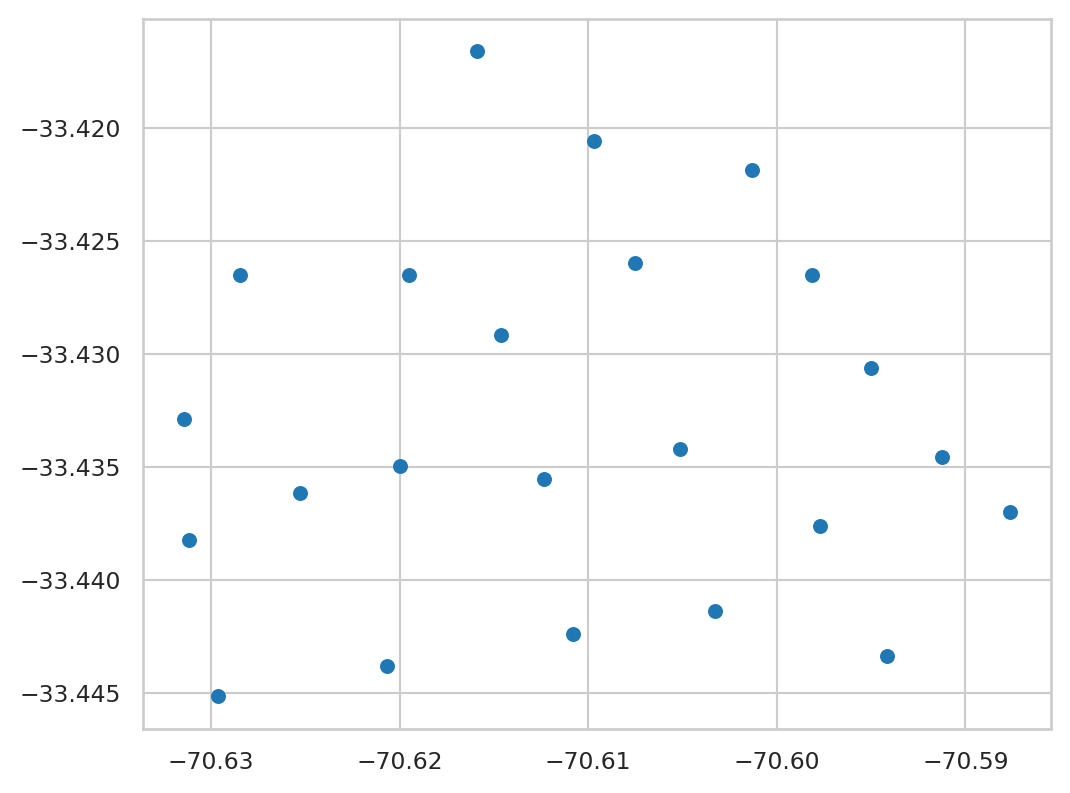

In [9]:
zones_in_providencia = zones[zones["NOM_COMUNA"] == "PROVIDENCIA"] 
zones_in_providencia.plot()

<Axes: >

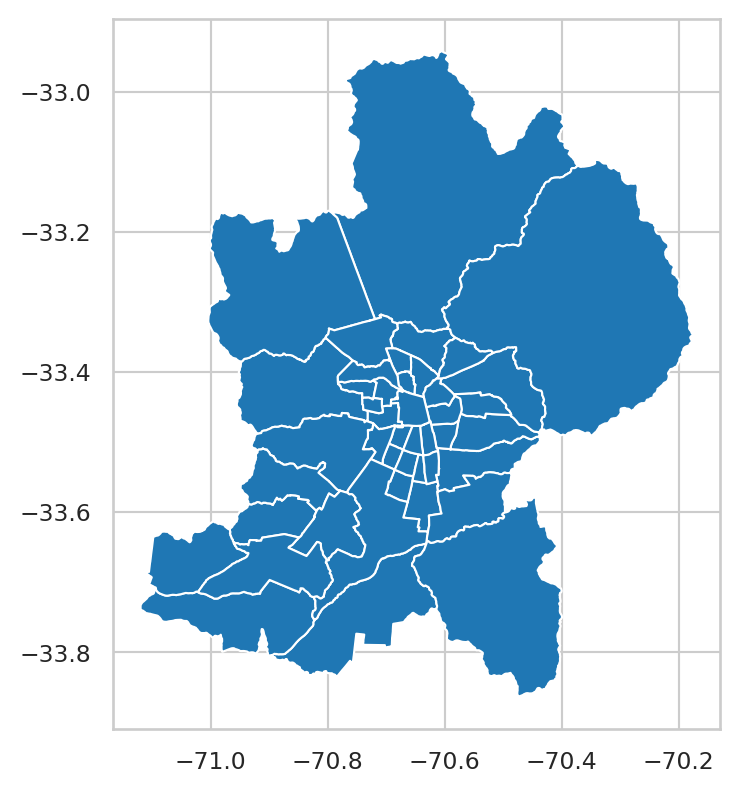

In [10]:
comunas_urbanas = comunas[comunas['COMUNA'].isin(zones_orig['Com'].unique())].drop('NOM_COMUNA', axis=1).copy()
comunas_urbanas['NombreComuna'] = comunas_urbanas['COMUNA'].map(dict(zip(zones_orig['Com'], zones_orig['Comuna'])))
comunas_urbanas.plot()

In [58]:
comunas_urbanas

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,SHAPE_Leng,SHAPE_Area,geometry,NombreComuna
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,0.884164,0.021166,"POLYGON ((-70.63192 -33.64634, -70.63207 -33.6...",Buin
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,0.720176,0.019124,"POLYGON ((-70.78914 -33.36153, -70.78824 -33.3...",Pudahuel
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,0.170180,0.001076,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...",Cerro Navia
4,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,1.692007,0.093820,"POLYGON ((-70.59630 -32.95138, -70.59673 -32.9...",Colina
6,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,1.046716,0.043569,"POLYGON ((-70.79418 -33.17180, -70.79314 -33.1...",Lampa
7,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13107,0.326251,0.004350,"POLYGON ((-70.66312 -33.32923, -70.66276 -33.3...",Huechuraba
8,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,0.138248,0.001077,"POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...",Conchalí
11,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13112,0.259374,0.002958,"POLYGON ((-70.63212 -33.55817, -70.63204 -33.5...",La Pintana
12,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,0.152123,0.001391,"POLYGON ((-70.65469 -33.54858, -70.65469 -33.5...",El Bosque
13,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13106,0.190249,0.001392,"POLYGON ((-70.67958 -33.44384, -70.67958 -33.4...",Estación Central


In [ ]:
from aves.visualization.figures import figure_from_geodataframe

fig, ax = figure_from_geodataframe(comunas_urbanas, height=7)

zones.plot(ax=ax, facecolor='#efefef', edgecolor='white', zorder=0)
comunas_urbanas.plot(ax=ax, facecolor='#efefef', edgecolor='black', zorder=1)

In [11]:
OSM_PATH = AVES_ROOT / "data" / "external" / "OSM"

osm_clipped_file = OSM_PATH / 'clipped-scl-osm.pbf'

if not osm_clipped_file.exists():
    import os
    bounds = zones.total_bounds
    print(bounds)
    print(f"osmconvert {OSM_PATH / 'chile-latest.osm.pbf'} -b={bounds[0]},{bounds[1]},{bounds[2]},{bounds[3]} -o={osm_clipped_file}")
    os.system(f"osmconvert {OSM_PATH / 'chile-latest.osm.pbf'} -b={bounds[0]},{bounds[1]},{bounds[2]},{bounds[3]} -o={osm_clipped_file}")
else:
    print('data already available :D')

data already available :D


In [12]:
import pyrosm

osm = pyrosm.OSM(str(osm_clipped_file))

POINTS OF INTEREST


In [13]:
pois = osm.get_pois()   

In [14]:
from aves.features.osm.pois import categorize_pois

cat_pois = categorize_pois(pois)
cat_pois

no match amenity telephone None
general match shop general
general match shop hardware
general match shop computer
no match building yes Castaño
general match shop yes
general match shop farm
no match amenity waste_transfer_station KDM
general match shop stationery
general match shop motorcycle
general match shop cosmetics
no match amenity school;kindergarten Colegio Madre de Jesús
general match shop toys
general match shop funeral_directors
no match amenity salon de belleza salon de belleza angel
general match shop gift
general match shop garden_centre
general match shop hifi
no match amenity vending_machine Máquina de Coca-Cola
no match amenity grave_yard Sodexo Chile
no match natural peak Cerro Tarapacá
general match shop tyres
no match highway elevator Ascensor Santa Lucía (closed)
no match amenity compressed_air None
general match shop gas
general match shop baby_goods
no match amenity internet_access Almacen Ciber Cafe
no match historic monument Casas de Calera de Tango
general m

,taxonomy,name,geometry
0,health,Lentes Online,POINT (-70.65112 -33.43955)
1,nightlife,Bar Ciudadano,POINT (-70.62849 -33.44622)
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654)
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654)
3,transport,Parada Colón Buses al Sur,POINT (-70.71517 -33.58955)
...,...,...,...
41326,transport:car,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3..."
41328,food,Odfjell Vineyards,"POLYGON ((-70.87753 -33.53971, -70.87754 -33.5..."
41329,religion,Catedral Metropolitana de Santiago de Chile,"POLYGON ((-70.65152 -33.43776, -70.65168 -33.4..."
41330,transport,None,"POLYGON ((-70.62382 -33.27129, -70.62376 -33.2..."


In [15]:
cat_pois_area = gpd.sjoin(cat_pois, zones_orig[["NOM_COMUNA", "geometry"]], op="within")
cat_pois_area


/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,taxonomy,name,geometry,index_right,NOM_COMUNA
0,health,Lentes Online,POINT (-70.65112 -33.43955),565,SANTIAGO
1,nightlife,Bar Ciudadano,POINT (-70.62849 -33.44622),700,PROVIDENCIA
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
4,entertainment,Museo de los Tajamares,POINT (-70.63040 -33.43560),699,PROVIDENCIA
...,...,...,...,...,...
41326,transport,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",664,HUECHURABA
41326,transport:car,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",664,HUECHURABA
41329,religion,Catedral Metropolitana de Santiago de Chile,"POLYGON ((-70.65152 -33.43776, -70.65168 -33.4...",565,SANTIAGO
41330,transport,None,"POLYGON ((-70.62382 -33.27129, -70.62376 -33.2...",521,COLINA


In [16]:
from aves.features.utils import standardize_columns
from aves.features.utils import normalize_rows, logodds_ratio_with_uninformative_dirichlet_prior


zone_pois = (
    cat_pois_area.groupby(["index_right", "taxonomy"])
    .size()
    .unstack(fill_value=0)
    .pipe(logodds_ratio_with_uninformative_dirichlet_prior)
)
zone_pois

taxonomy,accommodation,convenience,education,entertainment,finance,food,food:burger,food:coffee_shop,food:cuisine:french,food:cuisine:international,...,retail,store,sustainability,transport,transport:bike,transport:bus,transport:car,transport:moto,transport:public,transport:taxi
0,-0.066247,1.744455,1.923000,-0.075021,-0.073650,-0.093925,-0.013854,-0.020785,-0.006922,-0.013854,...,-0.075569,-0.079912,-0.057833,-0.091516,-0.071075,-0.037837,-0.089473,-0.039508,-0.038281,-0.047539
1,-0.092003,0.829299,1.608701,1.094361,-0.024321,-0.535812,-0.039609,-0.046541,-0.032677,-0.039609,...,-0.101326,-1.341140,-0.083589,0.256267,-0.460208,-0.063593,0.587441,-0.065264,-0.064037,-0.073295
2,-0.080915,-0.109481,0.284310,-0.089689,0.400489,-0.108594,-0.028521,-0.035453,-0.021589,-0.028521,...,-0.090237,-0.094580,-0.072501,5.429963,-0.085743,-0.052504,6.050553,-0.054176,-0.052949,-0.062206
3,-0.088716,-1.227698,0.795356,-0.522250,-0.385744,2.322686,-0.036321,-0.043253,-0.029390,-0.036321,...,-0.576738,3.104563,1.187635,-0.391490,-0.129571,-0.060305,-1.069836,-0.061976,-0.060750,4.068669
4,-0.084356,0.408452,0.738695,1.774683,-0.091759,-1.410622,-0.031962,-0.038894,-0.025030,-0.031962,...,-0.093678,-0.098022,1.620924,-0.098392,-0.089184,-0.055945,0.337250,-0.057617,-0.056390,-0.065647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,-0.078618,0.032210,0.828336,-0.087392,-0.086020,-0.359135,-0.026224,-0.033155,-0.019292,-0.026224,...,-0.087940,-0.092283,-0.070204,0.037610,-0.083446,-0.050207,0.373880,-0.051878,-0.050652,-0.059909
862,-0.082122,0.184453,0.941902,-0.090897,2.388304,1.759769,-0.029728,-0.036660,-0.022797,-0.029728,...,3.783230,-0.095788,-0.073708,-0.107392,-0.086950,-0.053712,-0.105349,-0.055383,-0.054156,-0.063414
863,-0.088477,-0.510336,-0.497783,-0.097252,-0.361707,0.762480,-0.036083,-0.043015,-0.029151,-0.036083,...,-0.097799,0.227042,1.211389,1.167802,0.837935,-0.060067,1.003239,-0.061738,-0.060511,-0.069769
864,-0.051215,1.361586,1.450912,-0.059989,-0.058617,-0.078892,0.001177,-0.005754,0.008108,0.001177,...,-0.060537,-0.064880,-0.042801,-0.076483,-0.056043,-0.022805,-0.074441,-0.024477,-0.023250,-0.032507


{'axis': <Axes: >,
 'cbar_axis': <AxesHostAxes: >,
 'built_palette': [(0.215686274509804, 0.5141868512110728, 0.7328719723183391),
  (0.4206843521722416, 0.6764321414840447, 0.8186851211072664),
  (0.6549019607843138, 0.8143790849673204, 0.8941176470588236),
  (0.8429834678969628, 0.9091118800461362, 0.9454825067281815),
  (0.9690888119953864, 0.9664744329104191, 0.9649365628604383),
  (0.9884659746251442, 0.8760476739715494, 0.8099192618223761),
  (0.9686274509803922, 0.7176470588235294, 0.6),
  (0.8945790080738177, 0.5038062283737024, 0.39976931949250283),
  (0.7893886966551327, 0.2768166089965398, 0.2549019607843137),
  (0.6461361014994232, 0.07750865051903114, 0.16032295271049596)],
 'bins': array([-6.04735674, -4.69230184, -3.33724694, -1.98219204, -0.62713715,
         0.72791775,  2.08297265,  3.43802755,  4.79308245,  6.14813735,
         7.50319225])}

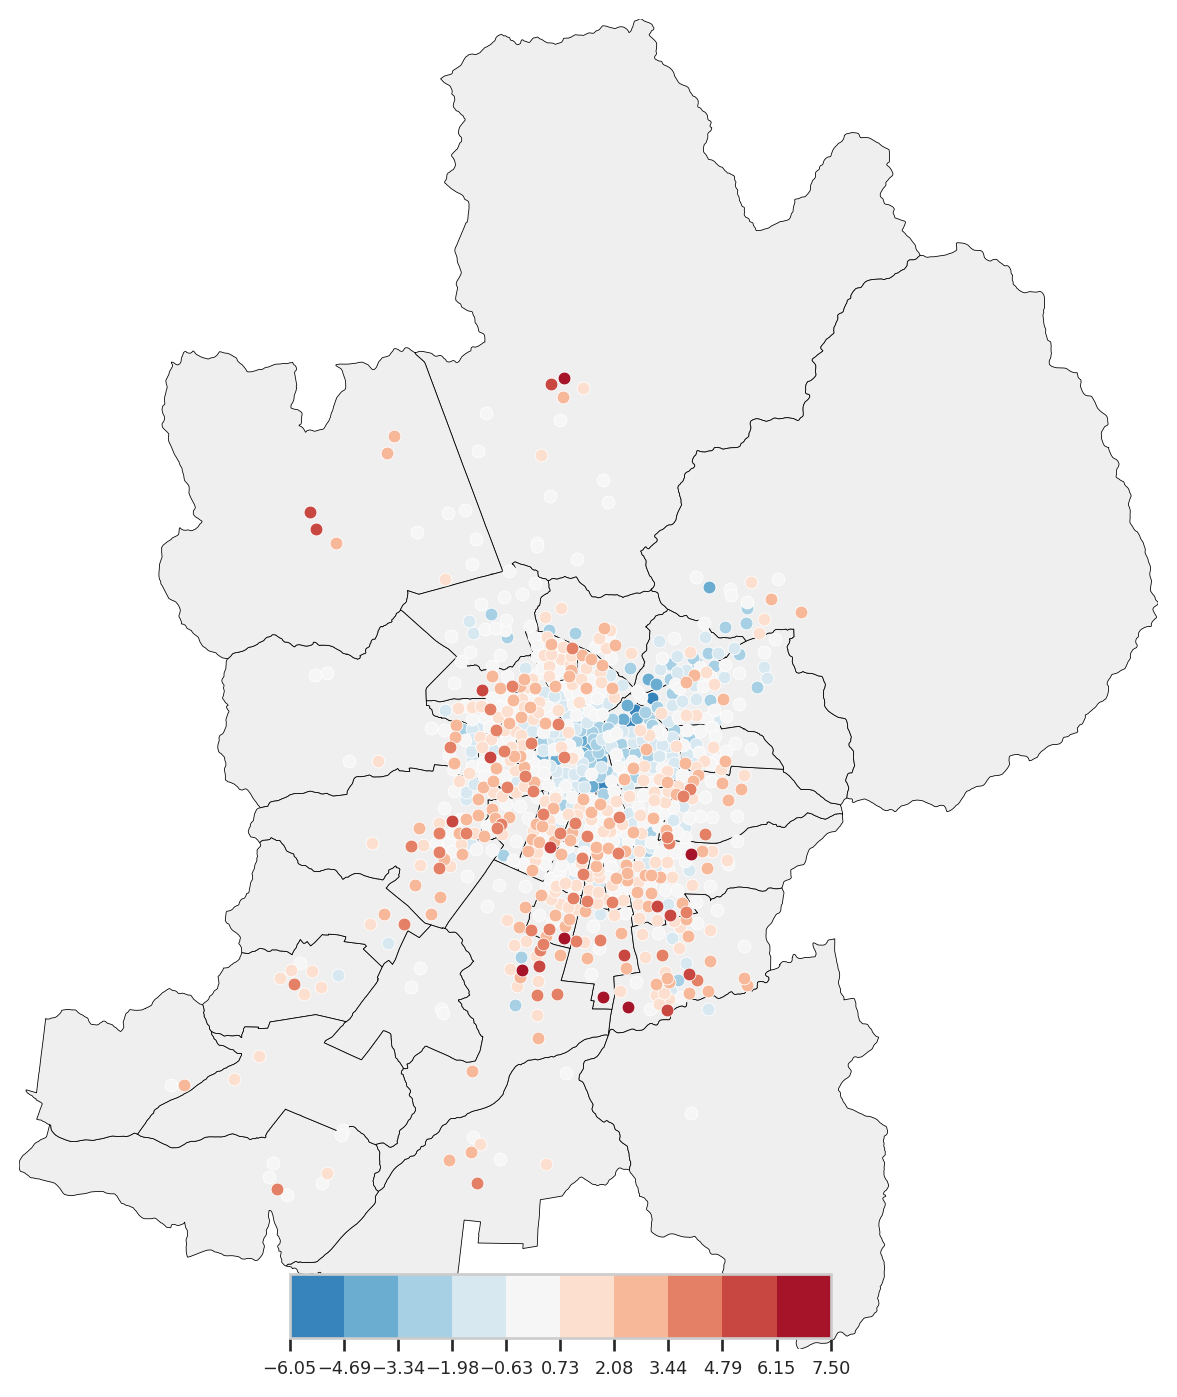

In [18]:
from aves.visualization.figures import figure_from_geodataframe
from aves.visualization.maps import choropleth_map

fig, ax = figure_from_geodataframe(comunas_urbanas, height= 9)

comunas_urbanas.plot(ax=ax, facecolor='#efefef', edgecolor='black', linewidth = 0.3,zorder=1)
choropleth_map(ax, zones.join(zone_pois), "education", linewidth=0.3,edgecolor = "white")



ValueError: '#black' is not a valid color value.

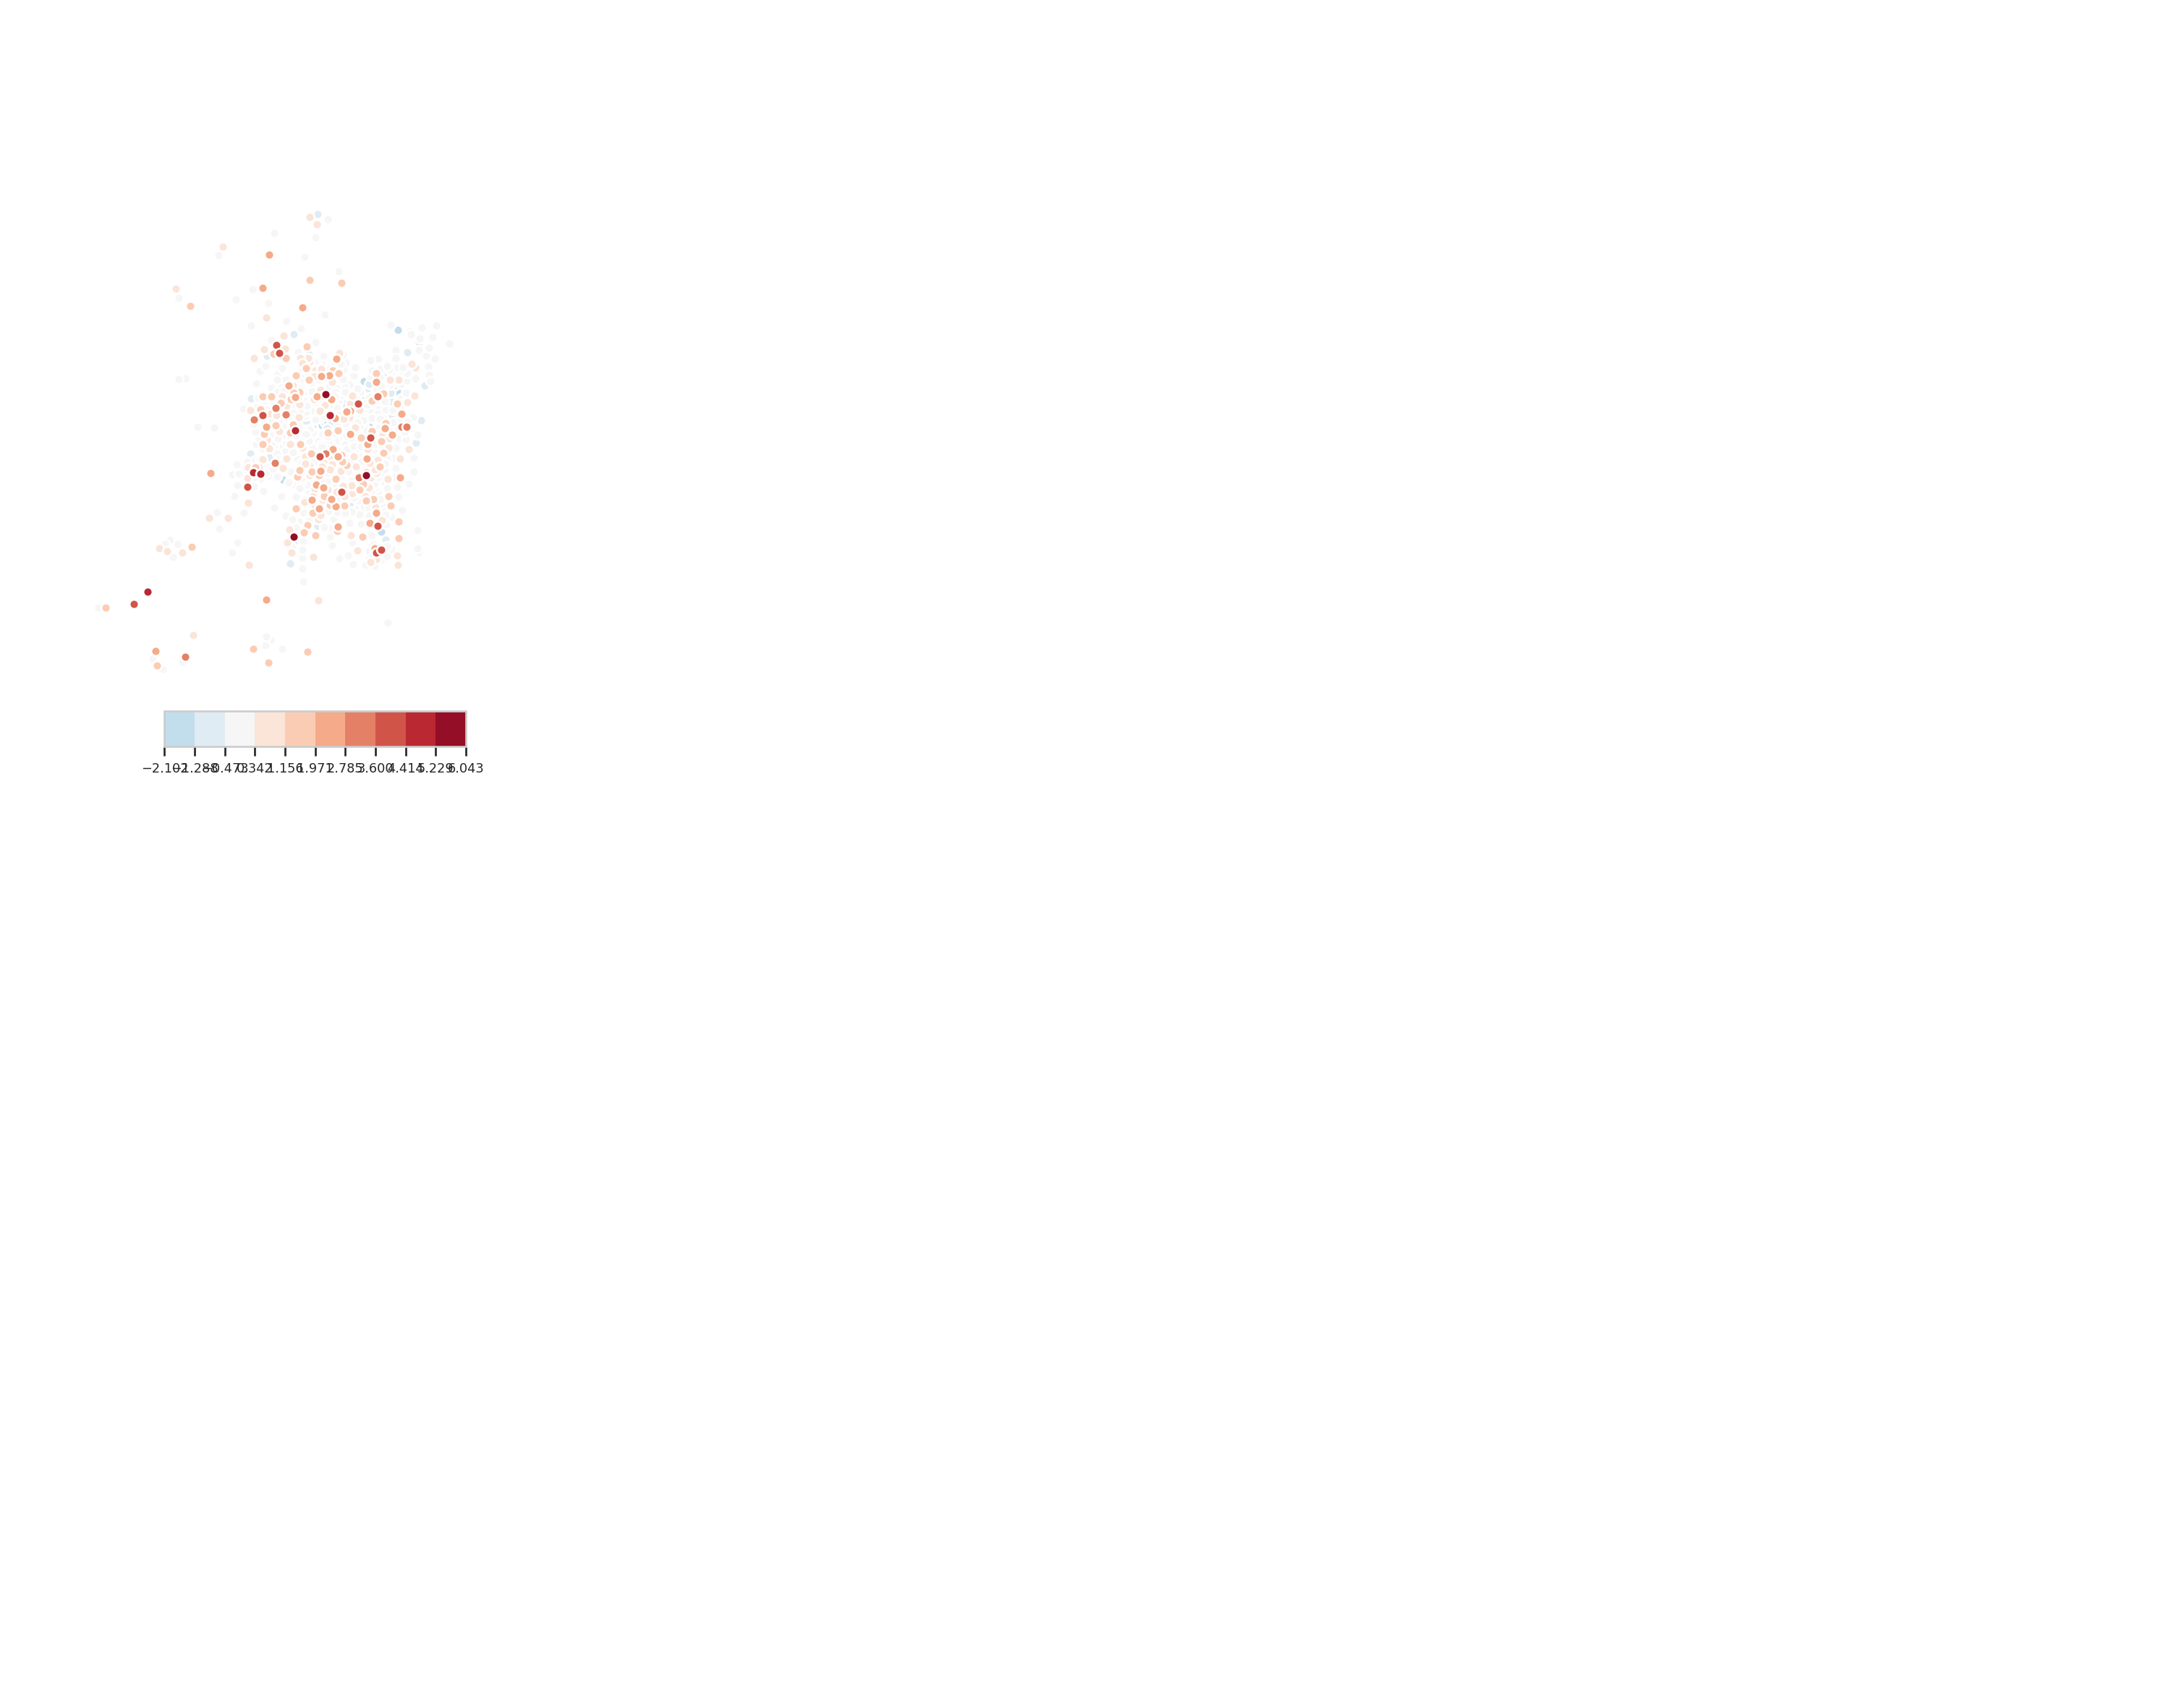

In [19]:
from aves.visualization.figures import small_multiples_from_geodataframe

fig, axes = small_multiples_from_geodataframe(comunas_urbanas, 6, height=8, col_wrap=3)

for ax, col in zip(
    axes,
    [
        "health",
        "education",
        "convenience",
        "professional",
        "entertainment",
    ],
):
    choropleth_map(ax, zones.join(zone_pois), col, linewidth=1)
    comunas_urbanas.plot(ax=ax, facecolor='gray', edgecolor='#black', zorder=1)
    ax.set_title(col)

fig.tight_layout()

In [20]:
comunas_urbanas_centroid = comunas_urbanas.geometry.centroid
comunas_urbanas["centroid_x"] = comunas_urbanas_centroid.x
comunas_urbanas["centroid_y"] = comunas_urbanas_centroid.y

comunas_urbanas


/tmp/ipykernel_764/3616499654.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  comunas_urbanas_centroid = comunas_urbanas.geometry.centroid


,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,SHAPE_Leng,SHAPE_Area,geometry,NombreComuna,centroid_x,centroid_y
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,0.884164,0.021166,"POLYGON ((-70.63192 -33.64634, -70.63207 -33.6...",Buin,-70.739073,-33.747535
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,0.720176,0.019124,"POLYGON ((-70.78914 -33.36153, -70.78824 -33.3...",Pudahuel,-70.854596,-33.423914
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,0.170180,0.001076,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...",Cerro Navia,-70.744115,-33.422230
4,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,1.692007,0.093820,"POLYGON ((-70.59630 -32.95138, -70.59673 -32.9...",Colina,-70.615693,-33.134552
6,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,1.046716,0.043569,"POLYGON ((-70.79418 -33.17180, -70.79314 -33.1...",Lampa,-70.875123,-33.277976
7,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13107,0.326251,0.004350,"POLYGON ((-70.66312 -33.32923, -70.66276 -33.3...",Huechuraba,-70.637636,-33.360195
8,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,0.138248,0.001077,"POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...",Conchalí,-70.676593,-33.383396
11,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13112,0.259374,0.002958,"POLYGON ((-70.63212 -33.55817, -70.63204 -33.5...",La Pintana,-70.637110,-33.587589
12,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,0.152123,0.001391,"POLYGON ((-70.65469 -33.54858, -70.65469 -33.5...",El Bosque,-70.676214,-33.562769
13,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13106,0.190249,0.001392,"POLYGON ((-70.67958 -33.44384, -70.67958 -33.4...",Estación Central,-70.700724,-33.464074


Text(0.5, 0.98, 'Diversidad de Puntos de Interes en Santiago')

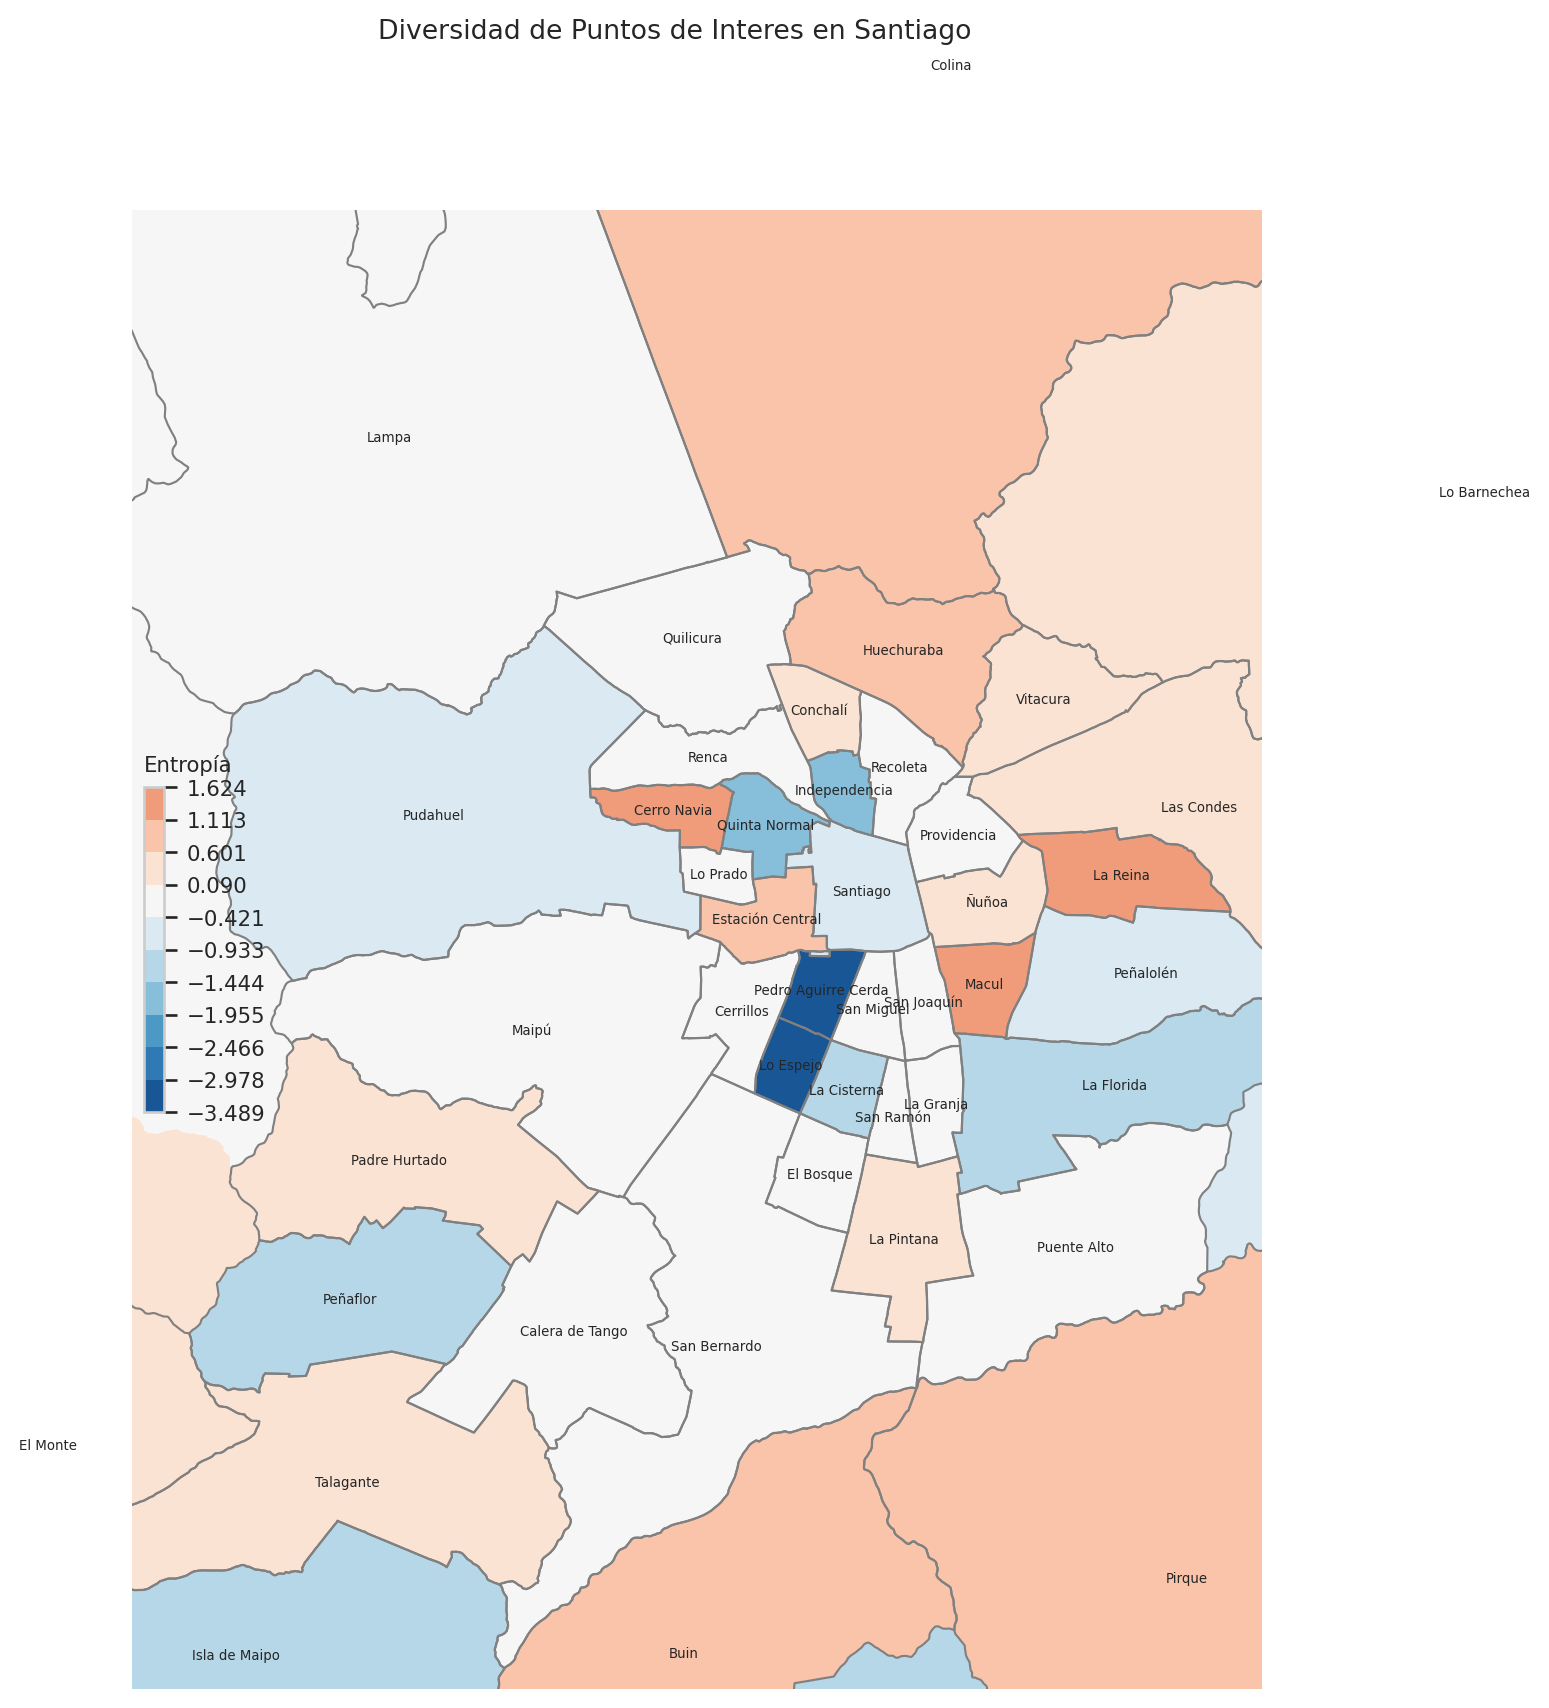

In [21]:
from scipy.stats import entropy

zone_entropy = (
    cat_pois_area.groupby(["index_right", "taxonomy"])
    .size()
    .unstack(fill_value=0)
    .apply(entropy, axis=1)
    .rename("poi_diversity")
    .to_frame()
    .pipe(standardize_columns)
)



fig, ax = figure_from_geodataframe(zones, height=10)

choropleth_map(
    ax, comunas.join(zone_entropy), "poi_diversity", edgecolor="black",linewidth=0, scheme="quantiles",cbar_args=dict(
        label="Entropía",
        height="22%",
        width="2%",
        orientation="vertical",
        location="center left",
        label_size="small",
        bbox_to_anchor=(0.0, 0.0, 0.9, 1.0),
    ),
)
comunas_urbanas.plot(ax=ax, facecolor='none', edgecolor='gray', zorder=1)

for idx, row in comunas_urbanas.iterrows():
    ax.text(row['centroid_x'], row['centroid_y'], row['NombreComuna'], 
             ha='center', va='center', fontsize=5)


fig.suptitle('Diversidad de Puntos de Interes en Santiago', fontsize=10)



In [22]:
cat_pois_comunas = gpd.sjoin(cat_pois, comunas_urbanas[["NombreComuna", "geometry"]], op="within")
cat_pois_comunas


/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_764/1602523877.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4674

  cat_pois_comunas = gpd.sjoin(cat_pois, comunas_urbanas[["NombreComuna", "geometry"]], op="within")


,taxonomy,name,geometry,index_right,NombreComuna
0,health,Lentes Online,POINT (-70.65112 -33.43955),47,Santiago
1,nightlife,Bar Ciudadano,POINT (-70.62849 -33.44622),46,Providencia
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),46,Providencia
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),46,Providencia
3,transport,Parada Colón Buses al Sur,POINT (-70.71517 -33.58955),39,San Bernardo
...,...,...,...,...,...
41326,transport:car,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",7,Huechuraba
41328,food,Odfjell Vineyards,"POLYGON ((-70.87753 -33.53971, -70.87754 -33.5...",34,Padre Hurtado
41329,religion,Catedral Metropolitana de Santiago de Chile,"POLYGON ((-70.65152 -33.43776, -70.65168 -33.4...",47,Santiago
41330,transport,None,"POLYGON ((-70.62382 -33.27129, -70.62376 -33.2...",4,Colina


In [23]:
comunas_pois = (
    cat_pois_comunas.groupby(["index_right", "taxonomy"])
    .size()
    .unstack(fill_value=0)
    .pipe(logodds_ratio_with_uninformative_dirichlet_prior)
)
comunas_pois

taxonomy,accommodation,convenience,education,entertainment,finance,food,food:burger,food:coffee_shop,food:cuisine:french,food:cuisine:international,...,store,sustainability,transport,transport:bike,transport:bus,transport:car,transport:moto,transport:pedestrian,transport:public,transport:taxi
1,-0.936349,-1.623108,4.051279,1.740669,-0.405678,-0.946697,-0.048334,-0.055266,-0.041402,-0.048334,...,-0.387844,-0.092798,0.533080,-1.354700,-0.074731,1.147667,-0.073989,-0.041402,-0.075082,0.984807
2,0.054407,1.361891,-3.104103,-2.933811,-3.112050,-0.091126,-0.063059,-0.069991,-0.056126,-0.063059,...,-3.527180,-0.107523,7.002832,-2.698607,2.418217,8.260709,0.371524,-0.056126,2.358916,1.853005
3,-0.109139,7.616198,2.088169,-1.238447,-2.354328,-3.539098,-0.055918,-0.062850,-0.048986,-0.055918,...,-3.089833,-0.100382,-1.774602,-2.115039,-0.082315,-0.762425,1.071888,-0.048986,-0.082666,-0.089944
4,-1.848031,-1.709192,3.676512,-1.412477,0.282228,-2.925541,-0.057437,-0.064370,-0.050505,-0.057437,...,0.531319,2.625123,1.937660,-1.440207,0.848649,2.845200,-0.083093,-0.050505,0.813456,-0.091463
6,-0.166557,0.366640,8.203391,1.694926,-0.644925,-1.983866,-0.047128,-0.054060,-0.040196,-0.047128,...,-1.103452,0.060804,-0.864540,-0.104530,-0.073525,0.004272,-0.072783,-0.040196,-0.073876,-0.081153
7,-1.933464,1.225183,-2.273665,-0.657462,-0.306553,-1.296451,-0.058291,-0.065223,-0.051359,-0.058291,...,2.564689,0.690331,3.895298,-2.158434,0.764809,4.791384,2.159903,-0.051359,0.729561,-0.003073
8,-1.542437,3.569157,5.983530,-0.492281,-0.980923,-3.124024,-0.054385,-0.061317,-0.047453,-0.054385,...,-2.342474,-0.098848,-3.549281,-1.961389,-0.080782,-2.698947,-0.080040,-0.047453,-0.081133,-0.088410
11,-0.106607,2.538300,10.211880,1.115833,-2.108508,-5.035348,-0.053387,-0.060319,-0.046455,-0.053387,...,-2.847268,1.660854,-2.564215,-0.110789,-0.079784,-1.678543,1.320073,-0.046455,-0.080135,-0.087412
12,-0.110077,3.727556,10.232154,2.058498,-1.863319,-2.690757,-0.056856,-0.063789,-0.049924,-0.056856,...,-2.237562,1.591628,-0.631409,-1.623330,-0.083253,-0.425658,-0.082512,-0.049924,-0.083604,3.896134
13,-0.419937,2.419068,1.548790,0.529952,-1.716153,0.161331,-0.060198,-0.067130,-0.053266,-0.060198,...,-3.507045,-0.770583,-0.603722,-2.058399,3.873155,-0.167706,-0.085854,-0.053266,3.808523,-0.192325


{'axis': <Axes: >,
 'cbar_axis': <AxesHostAxes: >,
 'built_palette': [(0.09711649365628607, 0.3377162629757786, 0.58800461361015),
  (0.18431372549019615, 0.4726643598615917, 0.7116493656286045),
  (0.29919261822376025, 0.5995386389850058, 0.7771626297577855),
  (0.5300269127258748, 0.7456362937331797, 0.8560553633217993),
  (0.7130334486735872, 0.8439061899269513, 0.910726643598616),
  (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
  (0.9690888119953864, 0.9664744329104191, 0.9649365628604383),
  (0.9856978085351789, 0.8889657823913879, 0.8320645905420991),
  (0.9769319492502884, 0.7674740484429068, 0.6636678200692044),
  (0.9407151095732411, 0.609919261822376, 0.481276432141484)],
 'bins': array([-18.55687398, -15.67509233, -12.79331068,  -9.91152903,
         -7.02974738,  -4.14796573,  -1.26618408,   1.61559758,
          4.49737923,   7.37916088,  10.26094253])}

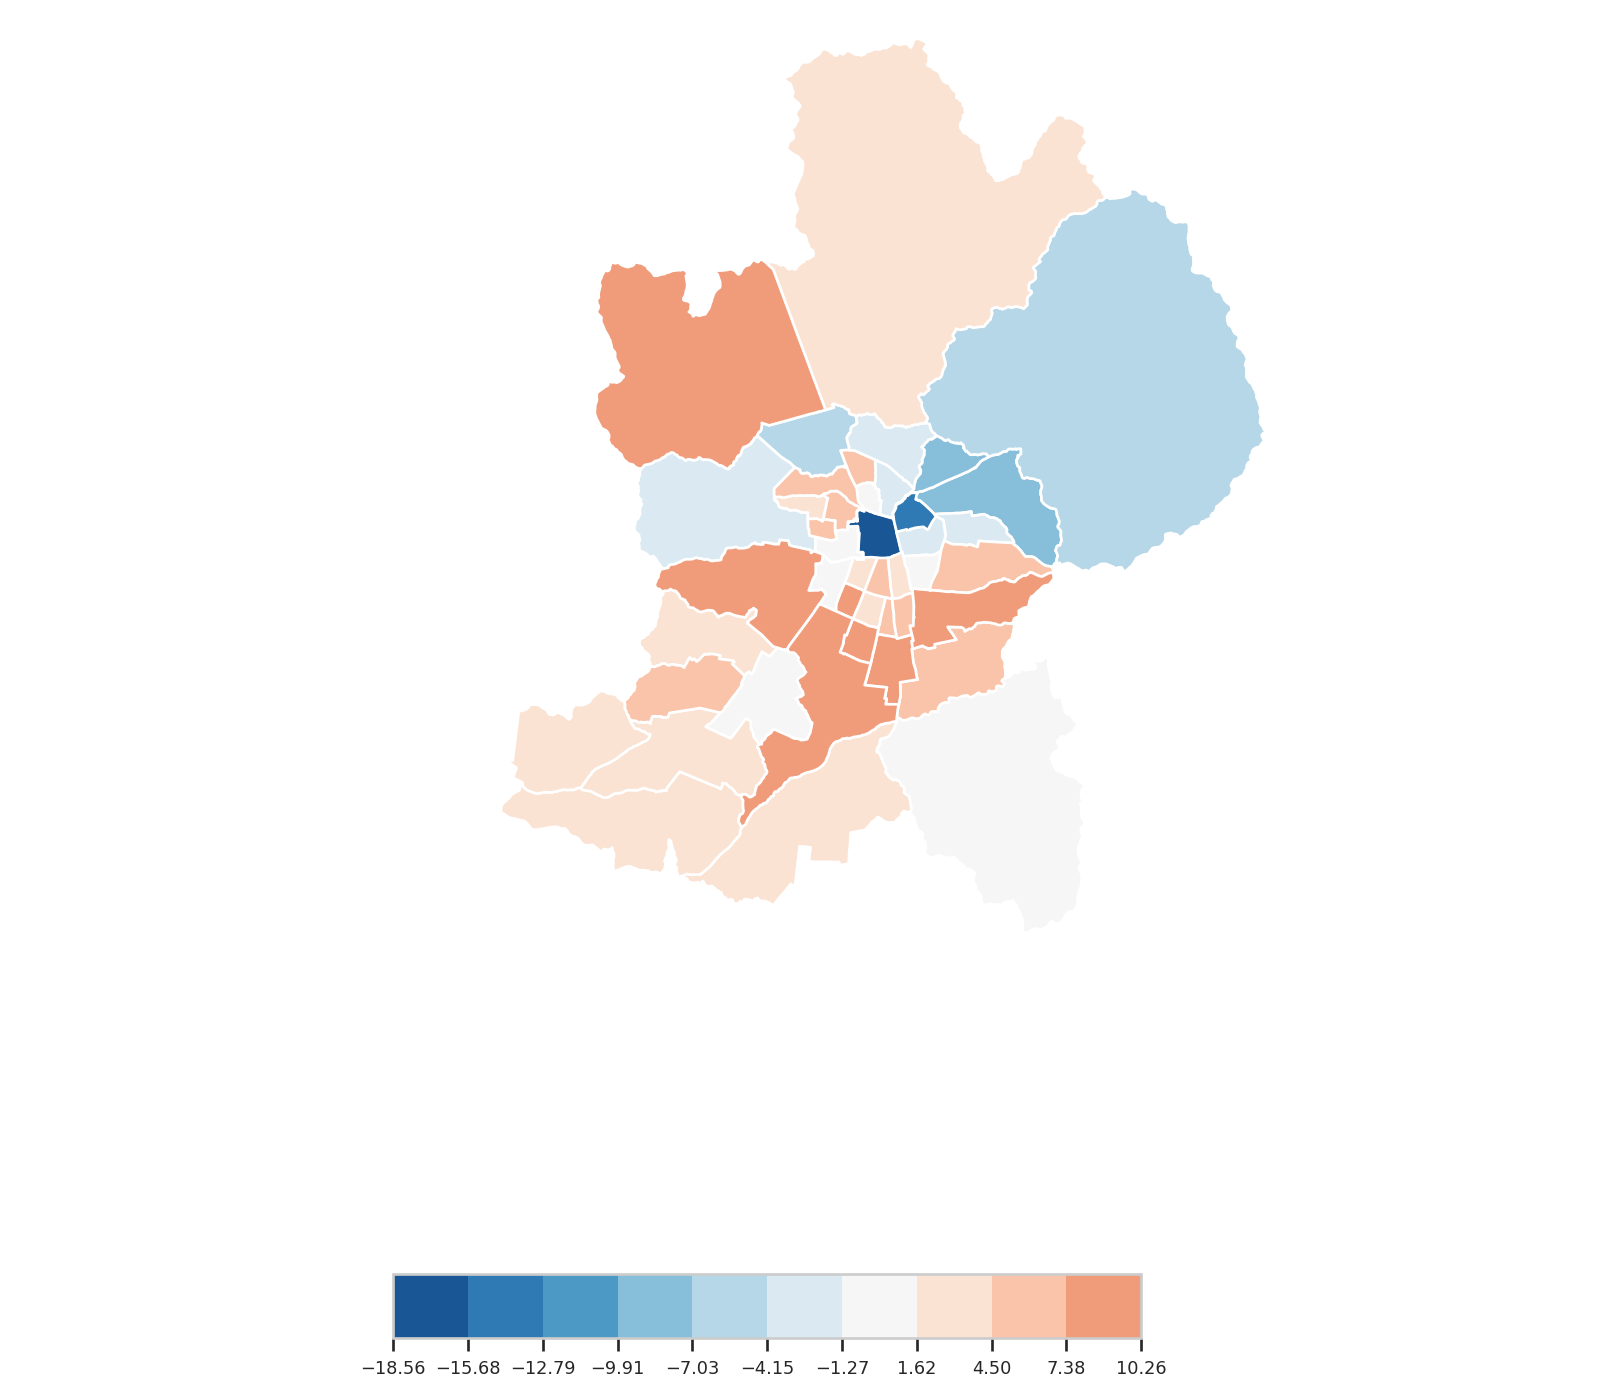

In [24]:
fig, ax = figure_from_geodataframe(comunas, height= 9)

choropleth_map(ax, comunas.join(comunas_pois), "education", linewidth=1)


In [25]:
import matplotlib.patheffects as path_effects


comunas_entropy = (
    cat_pois_comunas.groupby(["index_right", "taxonomy"])
    .size()
    .unstack(fill_value=0)
    .apply(entropy, axis=1)
    .rename("poi_diversity")
    .to_frame()
    .pipe(standardize_columns)
    
    
)


In [26]:
comunas_urbanas.join(comunas_entropy).sort_values("poi_diversity")


,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,SHAPE_Leng,SHAPE_Area,geometry,NombreComuna,centroid_x,centroid_y,poi_diversity
34,13,REGIÓN METROPOLITANA DE SANTIAGO,136,TALAGANTE,13604,0.509471,0.007871,"POLYGON ((-70.90757 -33.51003, -70.90666 -33.5...",Padre Hurtado,-70.870965,-33.557281,-2.375881
44,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13131,0.111438,0.000609,"POLYGON ((-70.63742 -33.51877, -70.63723 -33.5...",San Ramón,-70.642354,-33.540527,-2.356581
11,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13112,0.259374,0.002958,"POLYGON ((-70.63212 -33.55817, -70.63204 -33.5...",La Pintana,-70.637110,-33.587589,-1.749296
45,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13111,0.135456,0.000980,"POLYGON ((-70.60986 -33.53743, -70.60981 -33.5...",La Granja,-70.622485,-33.535576,-1.478651
8,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,0.138248,0.001077,"POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...",Conchalí,-70.676593,-33.383396,-1.474410
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,0.170180,0.001076,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...",Cerro Navia,-70.744115,-33.422230,-1.379791
48,13,REGIÓN METROPOLITANA DE SANTIAGO,136,TALAGANTE,13602,0.498398,0.011166,"POLYGON ((-70.98765 -33.61640, -70.98680 -33.6...",El Monte,-71.033018,-33.667345,-1.256348
26,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13126,0.176261,0.001146,"POLYGON ((-70.70646 -33.40781, -70.70616 -33.4...",Quinta Normal,-70.701076,-33.427599,-1.153826
18,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13116,0.111735,0.000800,"POLYGON ((-70.68305 -33.50624, -70.68297 -33.5...",Lo Espejo,-70.689738,-33.520416,-1.121270
42,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13129,0.134525,0.000965,"POLYGON ((-70.62322 -33.47457, -70.62321 -33.4...",San Joaquín,-70.628415,-33.496011,-0.793997


Text(0.5, 0.98, 'Diversidad de Puntos de Interes en Santiago')

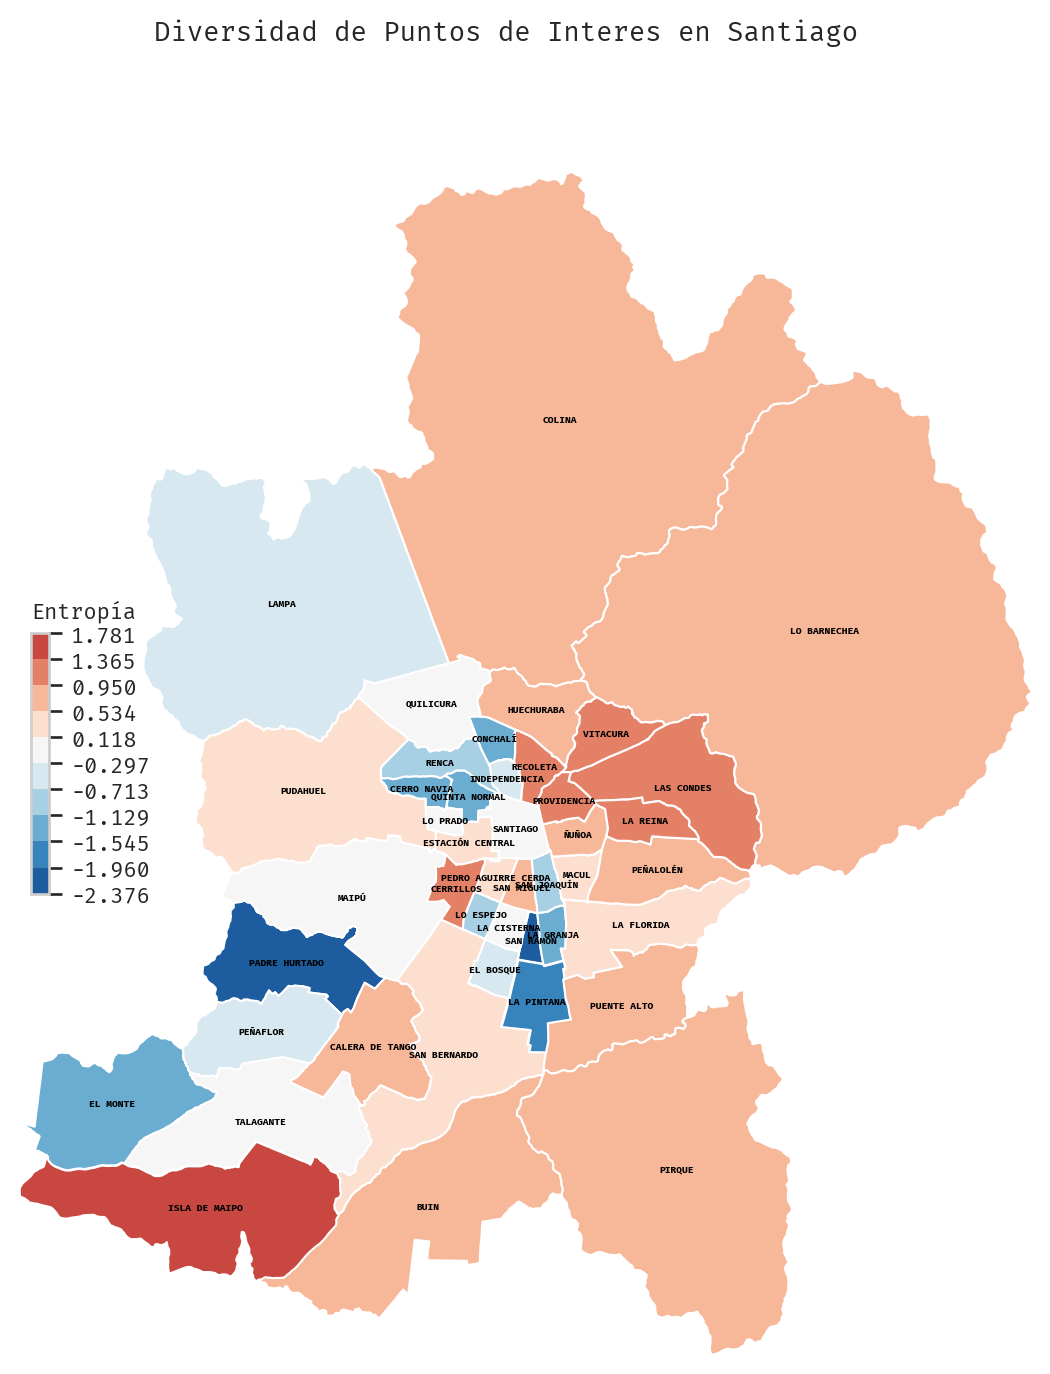

In [71]:
import matplotlib.patheffects as path_effects


comunas_entropy = (
    cat_pois_comunas.groupby(["index_right", "taxonomy"])
    .size()
    .unstack(fill_value=0)
    .apply(entropy, axis=1)
    .rename("poi_diversity")
    .to_frame()
    .pipe(standardize_columns)
    
    
)






fig, ax = figure_from_geodataframe(comunas_urbanas, height=8)

choropleth_map(
    ax, comunas.join(comunas_entropy), "poi_diversity", edgecolor="white",linewidth=0.8, scheme="quantiles",cbar_args=dict(
        label="Entropía",
        height="22%",
        width="2%",
        orientation="vertical",
        location="center left",
        label_size="small",
        bbox_to_anchor=(0.0, 0.0, 0.9, 1.0),
        
    ),
)


mpl.rcParams["font.family"] = "Fira Code"



# Add centroid labels
for idx, row in comunas_urbanas.iterrows():
    text = ax.text(row['centroid_x'], row['centroid_y'], row['NombreComuna'], 
                   ha='center', va='center', fontsize=3.5, fontweight='bold', color='black')
fig.suptitle('Diversidad de Puntos de Interes en Santiago', fontsize=10)

In [4]:
import sys

sys.argv.append(["--max-memory", "8G"])

import datetime
from pathlib import Path

import geopandas as gpd
import pandas as pd
import pyrosm
import seaborn as sns
from r5py import TransportMode, TransportNetwork, TravelTimeMatrixComputer

from aves.data import eod
from aves.visualization.figures import small_multiples_from_geodataframe

In [5]:
network = TransportNetwork("/home/javiergonb/aves/data/external/OSM/clipped-scl-osm.pbf", '/home/javiergonb/aves/data/external/gtfs/GTFS-V124-PO20240601b.zip')

In [5]:

OSM_PATH = AVES_ROOT / "data" / "external" / "OSM"
osm_clipped_file = OSM_PATH / "clipped-scl-osm.pbf"

zones = gpd.read_file(AVES_ROOT / "data" / "processed" / "scl_zonas_urbanas.json")


In [6]:
zones['geometry_original'] = zones['geometry']
zones['geometry'] = zones.centroid


/tmp/ipykernel_764/2940610672.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zones['geometry'] = zones.centroid


In [7]:
from aves.features.osm.pois import categorize_pois

cat_pois = categorize_pois(pois)
cat_pois


NameError: name 'pois' is not defined

In [8]:
zones_orig = zones.drop('geometry', axis=1).rename({'geometry_original': 'geometry'}, axis=1)

In [15]:
criteria = (
            (cat_pois_area["taxonomy"] == "health") |
            (cat_pois_area["taxonomy"] == "education") |
            (cat_pois_area["taxonomy"] == "food") |
            (cat_pois_area["taxonomy"] == "entertainment") |
            (cat_pois_area["taxonomy"] == "professional") |
            (cat_pois_area["taxonomy"] == "transport") |
            (cat_pois_area["taxonomy"] == "convenience")
            
            )
cat_pois_area_essentials = cat_pois_area.loc[criteria]
cat_pois_area_essentials

,taxonomy,name,geometry,index_right,NOM_COMUNA
0,health,Lentes Online,POINT (-70.65112 -33.43955),565,SANTIAGO
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
4,entertainment,Museo de los Tajamares,POINT (-70.63040 -33.43560),699,PROVIDENCIA
5,convenience,Farmacias Ahumada,POINT (-70.52505 -33.37624),414,LAS CONDES
...,...,...,...,...,...
41322,food,Galería Comercial Arturo Prat,"POLYGON ((-70.64953 -33.44772, -70.64952 -33.4...",571,SANTIAGO
41323,entertainment,Palacio Larraín Mancheño,"POLYGON ((-70.66285 -33.44319, -70.66319 -33.4...",593,SANTIAGO
41325,transport,Aparcadero Municipal de Pedro Aguirre Cerda,"POLYGON ((-70.67769 -33.50711, -70.67741 -33.5...",771,PEDRO AGUIRRE CERDA
41326,transport,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",664,HUECHURABA


In [14]:
people = eod.read_people()
people

,Hogar,Persona,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,...,TramoIngreso,IngresoFinal,TramoIngresoFinal,IngresoImputado,Factor_LaboralNormal,Factor_SabadoNormal,Factor_DomingoNormal,Factor_LaboralEstival,Factor_FindesemanaEstival,FactorPersona
0,100010,10001001,1958,Hombre,Jefe(a) de Hogar,2,3,2,2,4.0,...,Entre 200.001 y 400.000 pesos,240000,2,0,NaN,NaN,1668.2600,NaN,NaN,82.58553
1,100010,10001002,1956,Mujer,Cónyuge o pareja,5,1,2,2,5.0,...,NaN,0,0,0,NaN,NaN,852.1137,NaN,NaN,99.53422
2,100010,10001003,1982,Mujer,Hijo o Hija,0,1,2,2,7.0,...,Entre 200.001 y 400.000 pesos,210845,2,2,NaN,NaN,1609.1630,NaN,NaN,151.59367
3,100020,10002001,1954,Hombre,Jefe(a) de Hogar,4,3,2,2,4.0,...,Menos de 200.000 pesos,133000,1,0,169.50230,NaN,NaN,NaN,NaN,45.21325
4,100020,10002002,1961,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,Menos de 200.000 pesos,193000,1,0,43.26765,NaN,NaN,NaN,NaN,25.62248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60049,706791,70679101,1956,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,NaN,0,0,0,NaN,NaN,320.9519,NaN,NaN,17.87670
60050,706791,70679102,1955,Hombre,Jefe(a) de Hogar,0,1,2,2,5.0,...,Entre 200.001 y 400.000 pesos,396715,2,2,NaN,NaN,320.9519,NaN,NaN,21.07324
60051,743813,74381301,1943,Hombre,Jefe(a) de Hogar,2,1,2,2,5.0,...,Menos de 200.000 pesos,140369,1,2,NaN,NaN,281.4610,NaN,NaN,15.34897
60052,743813,74381302,1943,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,Menos de 200.000 pesos,177636,1,2,NaN,NaN,288.1693,NaN,NaN,17.30931


In [15]:
homes = eod.read_homes()
homes

,Hogar,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumVeh,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,1,1,0,2,53000.0,0,100000,0,450845,136.393738
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,1,3,0,1,NaN,0,120000,0,1019369,73.843597
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,0,0,3,NaN,0,70000,0,80000,180.722809
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,0,1,0,1,NaN,0,80000,0,559259,150.379059
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,0,0,1,NaN,0,117771,1,710309,122.001518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,0,1,1,1,NaN,0,100000,0,300000,75.526031
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,0,2,2,1,NaN,0,140000,0,695186,174.348663
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,0,0,1,NaN,0,200000,0,396715,71.358963
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,0,0,1,NaN,0,80000,0,318005,68.410446


In [16]:
from shapely.geometry import Point
homes['geometry'] = homes.apply(lambda row: Point(row['DirCoordX'], row['DirCoordY']), axis=1)
homes = gpd.GeoDataFrame(homes, geometry='geometry', crs="EPSG:4326")
population_per_home = people.groupby('Hogar').size().reset_index(name='population')
homes_with_population = homes.merge(population_per_home, on='Hogar')
homes_with_population

,Hogar,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry,population
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,0,2,53000.0,0,100000,0,450845,136.393738,POINT (335180.80190 6266420.97500),3
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,0,1,NaN,0,120000,0,1019369,73.843597,POINT (338410.21140 6265607.14100),5
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,3,NaN,0,70000,0,80000,180.722809,POINT (327863.82480 6257800.08600),1
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,0,1,NaN,0,80000,0,559259,150.379059,POINT (327864.00000 6257800.00000),5
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,1,NaN,0,117771,1,710309,122.001518,POINT (338480.81520 6267296.94100),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,1,1,NaN,0,100000,0,300000,75.526031,POINT (339104.10110 6263063.92500),5
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,2,1,NaN,0,140000,0,695186,174.348663,POINT (338539.17410 6299539.20300),6
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,1,NaN,0,200000,0,396715,71.358963,POINT (338563.22010 6299580.11800),2
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,1,NaN,0,80000,0,318005,68.410446,POINT (349410.28120 6289668.96200),2


In [17]:
homes = homes.rename(columns={'Hogar': 'id'}).drop_duplicates(subset=['id'])
homes

,id,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,1,0,2,53000.0,0,100000,0,450845,136.393738,POINT (335180.80190 6266420.97500)
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,3,0,1,NaN,0,120000,0,1019369,73.843597,POINT (338410.21140 6265607.14100)
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,0,3,NaN,0,70000,0,80000,180.722809,POINT (327863.82480 6257800.08600)
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,1,0,1,NaN,0,80000,0,559259,150.379059,POINT (327864.00000 6257800.00000)
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,0,1,NaN,0,117771,1,710309,122.001518,POINT (338480.81520 6267296.94100)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,1,1,1,NaN,0,100000,0,300000,75.526031,POINT (339104.10110 6263063.92500)
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,2,2,1,NaN,0,140000,0,695186,174.348663,POINT (338539.17410 6299539.20300)
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,0,1,NaN,0,200000,0,396715,71.358963,POINT (338563.22010 6299580.11800)
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,0,1,NaN,0,80000,0,318005,68.410446,POINT (349410.28120 6289668.96200)


In [154]:
zones_orig

,ID,AREA,Zona,Com,Comuna,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,area_m2,geometry
0,103,837.7500,103.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,4.575649e+05,"POLYGON ((-70.65492 -33.55500, -70.65517 -33.5..."
1,104,998.8125,104.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.725462e+05,"POLYGON ((-70.67599 -33.55542, -70.67452 -33.5..."
2,106,286.2500,106.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,2.693838e+06,"POLYGON ((-70.67891 -33.55911, -70.68019 -33.5..."
3,115,857.4375,115.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.534193e+05,"POLYGON ((-70.67625 -33.55513, -70.67653 -33.5..."
4,116,853.9375,116.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.184305e+05,"POLYGON ((-70.66564 -33.55260, -70.66309 -33.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,364,678.7500,364.0,13118,Macul,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13118,MACUL,MACUL,CAPITAL COMUNAL,CIUDAD,0.150721,0.001246,6.572471e+05,"POLYGON ((-70.59655 -33.47354, -70.59497 -33.4..."
862,369,793.2500,369.0,13118,Macul,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13118,MACUL,MACUL,CAPITAL COMUNAL,CIUDAD,0.150721,0.001246,6.393742e+05,"POLYGON ((-70.59590 -33.48557, -70.59681 -33.4..."
863,365,471.6875,365.0,13118,Macul,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13118,MACUL,MACUL,CAPITAL COMUNAL,CIUDAD,0.150721,0.001246,9.368650e+05,"POLYGON ((-70.60427 -33.47400, -70.60126 -33.4..."
864,734,864.0000,734.0,13301,Colina,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,COLINA,LO ARCAYA - CASAS VIEJAS,URBANO,PUEBLO,0.049422,0.000034,3.481754e+05,"POLYGON ((-70.69246 -33.24243, -70.69104 -33.2..."


In [18]:
cat_pois_area_essentials = gpd.sjoin(cat_pois, zones_orig[["NOM_COMUNA", "geometry"]], op="within")
cat_pois_area_essentials = cat_pois_area_essentials.rename(columns={'index_right': 'ID'})

cat_pois_area_essentials

/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,taxonomy,name,geometry,ID,NOM_COMUNA
0,health,Lentes Online,POINT (-70.65112 -33.43955),565,SANTIAGO
1,nightlife,Bar Ciudadano,POINT (-70.62849 -33.44622),700,PROVIDENCIA
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
4,entertainment,Museo de los Tajamares,POINT (-70.63040 -33.43560),699,PROVIDENCIA
...,...,...,...,...,...
41326,transport,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",664,HUECHURABA
41326,transport:car,None,"POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...",664,HUECHURABA
41329,religion,Catedral Metropolitana de Santiago de Chile,"POLYGON ((-70.65152 -33.43776, -70.65168 -33.4...",565,SANTIAGO
41330,transport,None,"POLYGON ((-70.62382 -33.27129, -70.62376 -33.2...",521,COLINA


In [19]:
criteria = (
            (cat_pois_area_essentials["taxonomy"] == "health") |
            (cat_pois_area_essentials["taxonomy"] == "education") |
            (cat_pois_area_essentials["taxonomy"] == "food") |
            (cat_pois_area_essentials["taxonomy"] == "entertainment") |
            (cat_pois_area_essentials["taxonomy"] == "professional") |
            (cat_pois_area_essentials["taxonomy"] == "transport") |
            (cat_pois_area_essentials["taxonomy"] == "convenience")
            
            )
cat_pois_area_essentials = cat_pois_area_essentials.loc[criteria]
cat_pois_area_essentials['geometry'] = cat_pois_area_essentials['geometry'].centroid
cat_pois_area_essentials

/tmp/ipykernel_752/127140369.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cat_pois_area_essentials['geometry'] = cat_pois_area_essentials['geometry'].centroid
/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,taxonomy,name,geometry,ID,NOM_COMUNA
0,health,Lentes Online,POINT (-70.65112 -33.43955),565,SANTIAGO
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
2,entertainment,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA
4,entertainment,Museo de los Tajamares,POINT (-70.63040 -33.43560),699,PROVIDENCIA
5,convenience,Farmacias Ahumada,POINT (-70.52505 -33.37624),414,LAS CONDES
...,...,...,...,...,...
41322,food,Galería Comercial Arturo Prat,POINT (-70.64928 -33.44781),571,SANTIAGO
41323,entertainment,Palacio Larraín Mancheño,POINT (-70.66303 -33.44334),593,SANTIAGO
41325,transport,Aparcadero Municipal de Pedro Aguirre Cerda,POINT (-70.67709 -33.50711),771,PEDRO AGUIRRE CERDA
41326,transport,None,POINT (-70.63485 -33.37592),664,HUECHURABA


In [162]:
homes

,id,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,1,0,2,53000.0,0,100000,0,450845,136.393738,POINT (335180.80190 6266420.97500)
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,3,0,1,NaN,0,120000,0,1019369,73.843597,POINT (338410.21140 6265607.14100)
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,0,3,NaN,0,70000,0,80000,180.722809,POINT (327863.82480 6257800.08600)
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,1,0,1,NaN,0,80000,0,559259,150.379059,POINT (327864.00000 6257800.00000)
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,0,1,NaN,0,117771,1,710309,122.001518,POINT (338480.81520 6267296.94100)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,1,1,1,NaN,0,100000,0,300000,75.526031,POINT (339104.10110 6263063.92500)
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,2,2,1,NaN,0,140000,0,695186,174.348663,POINT (338539.17410 6299539.20300)
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,0,1,NaN,0,200000,0,396715,71.358963,POINT (338563.22010 6299580.11800)
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,0,1,NaN,0,80000,0,318005,68.410446,POINT (349410.28120 6289668.96200)


In [24]:
people

,Hogar,Persona,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,...,TramoIngreso,IngresoFinal,TramoIngresoFinal,IngresoImputado,Factor_LaboralNormal,Factor_SabadoNormal,Factor_DomingoNormal,Factor_LaboralEstival,Factor_FindesemanaEstival,FactorPersona
0,100010,10001001,1958,Hombre,Jefe(a) de Hogar,2,3,2,2,4.0,...,Entre 200.001 y 400.000 pesos,240000,2,0,NaN,NaN,1668.2600,NaN,NaN,82.58553
1,100010,10001002,1956,Mujer,Cónyuge o pareja,5,1,2,2,5.0,...,NaN,0,0,0,NaN,NaN,852.1137,NaN,NaN,99.53422
2,100010,10001003,1982,Mujer,Hijo o Hija,0,1,2,2,7.0,...,Entre 200.001 y 400.000 pesos,210845,2,2,NaN,NaN,1609.1630,NaN,NaN,151.59367
3,100020,10002001,1954,Hombre,Jefe(a) de Hogar,4,3,2,2,4.0,...,Menos de 200.000 pesos,133000,1,0,169.50230,NaN,NaN,NaN,NaN,45.21325
4,100020,10002002,1961,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,Menos de 200.000 pesos,193000,1,0,43.26765,NaN,NaN,NaN,NaN,25.62248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60049,706791,70679101,1956,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,NaN,0,0,0,NaN,NaN,320.9519,NaN,NaN,17.87670
60050,706791,70679102,1955,Hombre,Jefe(a) de Hogar,0,1,2,2,5.0,...,Entre 200.001 y 400.000 pesos,396715,2,2,NaN,NaN,320.9519,NaN,NaN,21.07324
60051,743813,74381301,1943,Hombre,Jefe(a) de Hogar,2,1,2,2,5.0,...,Menos de 200.000 pesos,140369,1,2,NaN,NaN,281.4610,NaN,NaN,15.34897
60052,743813,74381302,1943,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,Menos de 200.000 pesos,177636,1,2,NaN,NaN,288.1693,NaN,NaN,17.30931


In [ ]:
comunas_urbanas

In [23]:
cat_pois_area["geometry"]

0                              POINT (-70.65112 -33.43955)
1                              POINT (-70.62849 -33.44622)
2                              POINT (-70.61465 -33.44654)
2                              POINT (-70.61465 -33.44654)
4                              POINT (-70.63040 -33.43560)
                               ...                        
41326    POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...
41326    POLYGON ((-70.63484 -33.37533, -70.63496 -33.3...
41329    POLYGON ((-70.65152 -33.43776, -70.65168 -33.4...
41330    POLYGON ((-70.62382 -33.27129, -70.62376 -33.2...
41330    POLYGON ((-70.62382 -33.27129, -70.62376 -33.2...
Name: geometry, Length: 45068, dtype: geometry

In [20]:
from pyproj import Transformer

# Convert x, y coordinates to geometry
def transform_coordinates(x, y):
    transformer = Transformer.from_crs("EPSG:32719", "EPSG:4326", always_xy=True)  # UTM to WGS84
    lon, lat = transformer.transform(x, y)
    return Point(lon, lat)


In [23]:
homes

,id,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumVeh,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,1,1,0,2,53000.0,0,100000,0,450845,136.393738
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,1,3,0,1,NaN,0,120000,0,1019369,73.843597
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,0,0,3,NaN,0,70000,0,80000,180.722809
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,0,1,0,1,NaN,0,80000,0,559259,150.379059
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,0,0,1,NaN,0,117771,1,710309,122.001518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,0,1,1,1,NaN,0,100000,0,300000,75.526031
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,0,2,2,1,NaN,0,140000,0,695186,174.348663
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,0,0,1,NaN,0,200000,0,396715,71.358963
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,0,0,1,NaN,0,80000,0,318005,68.410446


In [21]:
homes['geometry'] = homes.apply(lambda row: transform_coordinates(row['DirCoordX'], row['DirCoordY']), axis=1)
homes

,id,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,1,0,2,53000.0,0,100000,0,450845,136.393738,POINT (-70.77903 -33.72944)
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,3,0,1,NaN,0,120000,0,1019369,73.843597,POINT (-70.74434 -33.73728)
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,0,0,3,NaN,0,70000,0,80000,180.722809,POINT (-70.85966 -33.80599)
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,1,0,1,NaN,0,80000,0,559259,150.379059,POINT (-70.85965 -33.80599)
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,0,0,1,NaN,0,117771,1,710309,122.001518,POINT (-70.74327 -33.72205)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,1,1,1,NaN,0,100000,0,300000,75.526031,POINT (-70.73731 -33.76031)
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,2,2,1,NaN,0,140000,0,695186,174.348663,POINT (-70.73681 -33.43139)
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,0,0,1,NaN,0,200000,0,396715,71.358963,POINT (-70.73654 -33.43102)
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,0,0,1,NaN,0,80000,0,318005,68.410446,POINT (-70.62157 -33.52196)


<Axes: >

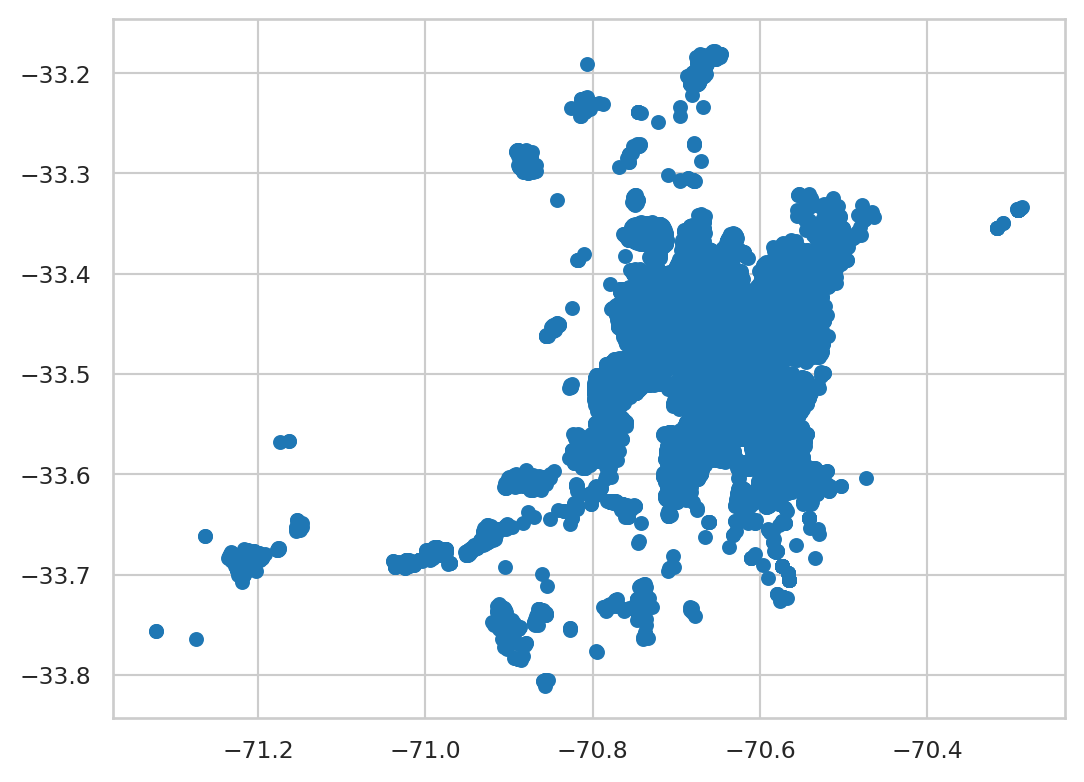

In [29]:
homes.plot()

In [22]:
# Convert to GeoDataFrame
homes_gdf = gpd.GeoDataFrame(homes, geometry='geometry')
homes_gdf.crs = "EPSG:4326"


In [31]:
homes_gdf.to_file("geod/homes_geom.geojson", driver='GeoJSON')

In [32]:
criteria = (
            (cat_pois_area["taxonomy"] == "education") 
            
            
            )
school_pois = cat_pois_area.loc[criteria]
school_pois['geometry_original'] = school_pois['geometry']
school_pois['geometry'] = school_pois.centroid
school_pois

/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_931/987783457.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  school_pois['geometry'] = school_pois.centroid


,taxonomy,name,geometry,index_right,NOM_COMUNA,geometry_original
2,education,Café Literario Santa Isabel,POINT (-70.61465 -33.44654),696,PROVIDENCIA,POINT (-70.61465 -33.44654)
95,education,Bibliotren,POINT (-70.57514 -33.61610),109,PUENTE ALTO,POINT (-70.57514 -33.61610)
160,education,ANEPE,POINT (-70.59669 -33.42841),692,PROVIDENCIA,POINT (-70.59669 -33.42841)
215,education,Instituto Profesional de Artes Culinarias y Se...,POINT (-70.52118 -33.34828),500,LO BARNECHEA,POINT (-70.52118 -33.34828)
237,education,None,POINT (-70.62878 -33.44402),700,PROVIDENCIA,POINT (-70.62878 -33.44402)
...,...,...,...,...,...,...
41301,education,Colegio Bradford School,POINT (-70.57294 -33.38430),479,VITACURA,"MULTIPOLYGON (((-70.57288 -33.38492, -70.57266..."
41309,education,Universidad Alberto Hurtado,POINT (-70.66210 -33.44513),593,SANTIAGO,"MULTIPOLYGON (((-70.66304 -33.44492, -70.66300..."
41310,education,Universidad Diego Portales,POINT (-70.66043 -33.45059),574,SANTIAGO,"MULTIPOLYGON (((-70.66196 -33.44982, -70.66193..."
41315,education,Universidad Mayor Campus Santo Domingo,POINT (-70.64773 -33.43553),564,SANTIAGO,"POLYGON ((-70.64793 -33.43580, -70.64793 -33.4..."


<Axes: >

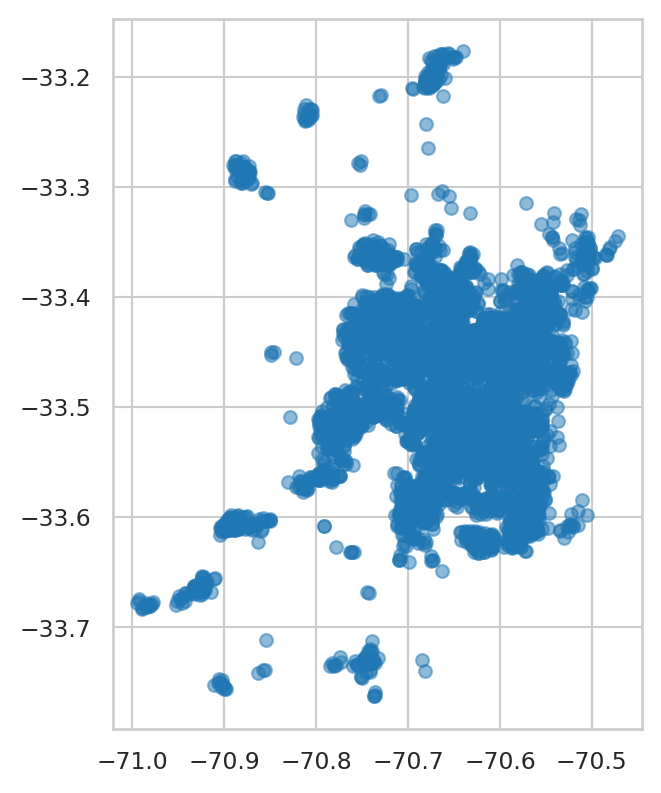

In [33]:
school_pois.plot(alpha=0.5)

In [34]:




full_cost_computer = TravelTimeMatrixComputer(
    network,
    # todos los orígenes
    origins=homes_gdf.drop_duplicates(subset=['id']),
    # solo celdas con hospitales
    destinations=school_pois.rename(columns={'index_right': 'id'}).drop_duplicates(subset=['id']),
    departure=datetime.datetime(2018, 7, 10, 8, 30),
    transport_modes=[TransportMode.TRANSIT, TransportMode.WALK],
)
travel_time_matrix = full_cost_computer.compute_travel_times()

# Filter travel times within 15 minutes (900 seconds)
accessibility_matrix = travel_time_matrix[travel_time_matrix['travel_time'] <= 900]

/home/javiergonb/miniconda3/envs/aves/lib/python3.11/site-packages/r5py/r5/regional_task.py:223: RuntimeWarning: Departure time 2018-07-10 08:30:00 is outside of the time range covered by currently loaded GTFS data sets.
  warnings.warn(


In [23]:
# Merge people with homes to get the commune for each person
people_homes = people.merge(homes, left_on='Hogar', right_on='id', suffixes=('', '_home'))
people_homes

,Hogar,Persona,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,...,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry
0,100010,10001001,1958,Hombre,Jefe(a) de Hogar,2,3,2,2,4.0,...,1,0,2,53000.0,0,100000,0,450845,136.393738,POINT (-70.77903 -33.72944)
1,100010,10001002,1956,Mujer,Cónyuge o pareja,5,1,2,2,5.0,...,1,0,2,53000.0,0,100000,0,450845,136.393738,POINT (-70.77903 -33.72944)
2,100010,10001003,1982,Mujer,Hijo o Hija,0,1,2,2,7.0,...,1,0,2,53000.0,0,100000,0,450845,136.393738,POINT (-70.77903 -33.72944)
3,100020,10002001,1954,Hombre,Jefe(a) de Hogar,4,3,2,2,4.0,...,3,0,1,NaN,0,120000,0,1019369,73.843597,POINT (-70.74434 -33.73728)
4,100020,10002002,1961,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,3,0,1,NaN,0,120000,0,1019369,73.843597,POINT (-70.74434 -33.73728)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60049,706791,70679101,1956,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,0,0,1,NaN,0,200000,0,396715,71.358963,POINT (-70.73654 -33.43102)
60050,706791,70679102,1955,Hombre,Jefe(a) de Hogar,0,1,2,2,5.0,...,0,0,1,NaN,0,200000,0,396715,71.358963,POINT (-70.73654 -33.43102)
60051,743813,74381301,1943,Hombre,Jefe(a) de Hogar,2,1,2,2,5.0,...,0,0,1,NaN,0,80000,0,318005,68.410446,POINT (-70.62157 -33.52196)
60052,743813,74381302,1943,Mujer,Cónyuge o pareja,2,1,2,2,4.0,...,0,0,1,NaN,0,80000,0,318005,68.410446,POINT (-70.62157 -33.52196)


In [24]:
population_per_commune = people_homes['Comuna'].value_counts()
population_per_commune

Comuna
PUENTE ALTO            6142
MAIPU                  5314
LA FLORIDA             3321
SAN BERNARDO           2717
LA PINTANA             2335
SANTIAGO               2262
LAS CONDES             2253
QUILICURA              2147
PUDAHUEL               1989
PEÑALOLEN              1759
ÑUÑOA                  1747
EL BOSQUE              1480
PROVIDENCIA            1153
RECOLETA               1139
CONCHALI               1123
LA GRANJA              1092
RENCA                  1067
PEDRO AGUIRRE CERDA    1017
CERRO NAVIA             967
ESTACION CENTRAL        963
COLINA                  962
MACUL                   894
PEÑAFLOR                859
MELIPILLA               848
SAN MIGUEL              842
LA REINA                835
SAN JOAQUIN             828
QUINTA NORMAL           800
SAN RAMON               781
LO BARNECHEA            779
HUECHURABA              775
LA CISTERNA             723
LAMPA                   713
LO ESPEJO               711
LO PRADO                674
INDEPENDENCIA

In [25]:
# Calculate the number of accessible amenities per home
school_df = accessibility_matrix.groupby('from_id').size()

NameError: name 'accessibility_matrix' is not defined

In [38]:
# Convert the Series to a DataFrame
accessibility_per_home = accessibility_per_home.reset_index(name='accessibility')
accessibility_per_home

,from_id,accessibility
0,100010,5
1,100020,6
2,100052,5
3,100061,5
4,100070,5
...,...,...
17877,700990,6
17878,706781,109
17879,706791,109
17880,743813,171


In [40]:

# Merge accessibility with homes to get the commune for each home
accessibility_homes = homes.merge(accessibility_per_home, left_on='id', right_on='from_id', how='left').fillna(0)
accessibility_homes

,id,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,...,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,geometry,from_id,accessibility
0,100010,Extensión Sur-Poniente,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,...,2,53000.0,0,100000,0,450845,136.393738,POINT (-70.77903 -33.72944),100010.0,5.0
1,100020,Extensión Sur-Poniente,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,...,1,0.0,0,120000,0,1019369,73.843597,POINT (-70.74434 -33.73728),100020.0,6.0
2,100030,Extensión Sur-Poniente,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,...,3,0.0,0,70000,0,80000,180.722809,POINT (-70.85966 -33.80599),0.0,0.0
3,100041,Extensión Sur-Poniente,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,...,1,0.0,0,80000,0,559259,150.379059,POINT (-70.85965 -33.80599),0.0,0.0
4,100052,Extensión Sur-Poniente,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,...,1,0.0,0,117771,1,710309,122.001518,POINT (-70.74327 -33.72205),100052.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,700990,Extensión Sur-Poniente,785,BUIN,339104.1011,6263063.925,24-11-2013,domingo,2,1,...,1,0.0,0,100000,0,300000,75.526031,POINT (-70.73731 -33.76031),700990.0,6.0
18260,706781,Poniente,69,CERRO NAVIA,338539.1741,6299539.203,24-11-2013,domingo,2,1,...,1,0.0,0,140000,0,695186,174.348663,POINT (-70.73681 -33.43139),706781.0,109.0
18261,706791,Poniente,69,CERRO NAVIA,338563.2201,6299580.118,24-11-2013,domingo,2,1,...,1,0.0,0,200000,0,396715,71.358963,POINT (-70.73654 -33.43102),706791.0,109.0
18262,743813,Sur,244,LA GRANJA,349410.2812,6289668.962,24-11-2013,domingo,2,1,...,1,0.0,0,80000,0,318005,68.410446,POINT (-70.62157 -33.52196),743813.0,171.0


In [42]:
mean_accessibility_per_commune = accessibility_homes.groupby('Comuna')['accessibility'].mean()


In [43]:
mean_accessibility_per_commune

Comuna
BUIN                     4.965909
CALERA DE TANGO          5.072368
CERRILLOS              115.135000
CERRO NAVIA             95.741830
COLINA                   4.440154
CONCHALI               102.980645
EL BOSQUE               87.840964
EL MONTE                 2.737143
ESTACION CENTRAL       169.422961
HUECHURABA              56.625532
INDEPENDENCIA          164.515556
ISLA DE MAIPO            3.162651
LA CISTERNA            143.545852
LA FLORIDA             119.498556
LA GRANJA              152.476974
LA PINTANA              96.135780
LA REINA               108.161765
LAMPA                    3.934783
LAS CONDES             103.213964
LO BARNECHEA            20.521368
LO ESPEJO              125.010204
LO PRADO               140.131579
MACUL                  169.053763
MAIPU                   61.083902
MELIPILLA                0.000000
PADRE HURTADO           11.248408
PEDRO AGUIRRE CERDA    165.993243
PEÑAFLOR                 8.120000
PEÑALOLEN              106.292434
PIRQUE 

In [44]:
accessibility_index = mean_accessibility_per_commune / population_per_commune

In [85]:
# Convert to a DataFrame for merging
accessibility_index_df = accessibility_index.reset_index()
accessibility_index_df.columns = ['Comuna', 'accessibility_index']

In [86]:
accessibility_index_df= accessibility_index_df.rename(columns={"Comuna":"NombreComuna"})

In [90]:
accessibility_index_df['NombreComuna'] = accessibility_index_df['NombreComuna'].replace({
    'CONCHALI': 'CONCHALÍ',
    'ESTACION CENTRAL': 'ESTACIÓN CENTRAL',
    'PEÑALOLEN' : 'PEÑALOLÉN',
    'MAIPU' : 'MAIPÚ',
    'SAN RAMON' : 'SAN RAMÓN',
    'SAN JOAQUIN' : 'SAN JOAQUÍN'

})

In [59]:
import matplotlib.pyplot as plt
comunas_urbanas['NombreComuna'] = comunas_urbanas['NombreComuna'].str.upper()


In [91]:
accessibility_index_schools_df = accessibility_index_df

In [94]:
import pandas as pd

# Assuming you have a DataFrame named df
accessibility_index_schools_df.to_json("accesability_dfs/accses_schools.json", force_ascii=False, orient='records')

In [96]:
# Read the JSON file back into a DataFrame
df_read = pd.read_json("accesability_dfs/accses_schools.json", orient='records')

# Display the DataFrame
print(df_read)

           NombreComuna  accessibility_index
0                  BUIN             0.008489
1       CALERA DE TANGO             0.009273
2             CERRILLOS             0.187822
3           CERRO NAVIA             0.099009
4                COLINA             0.004616
5              CONCHALÍ             0.091701
6             EL BOSQUE             0.059352
7              EL MONTE             0.004324
8      ESTACIÓN CENTRAL             0.175932
9            HUECHURABA             0.073065
10        INDEPENDENCIA             0.256655
11        ISLA DE MAIPO             0.005262
12          LA CISTERNA             0.198542
13           LA FLORIDA             0.035983
14            LA GRANJA             0.139631
15           LA PINTANA             0.041172
16             LA REINA             0.129535
17                LAMPA             0.005519
18           LAS CONDES             0.045812
19         LO BARNECHEA             0.026343
20            LO ESPEJO             0.175823
21        

: 

In [68]:
unique_communes = comunas_urbanas["NombreComuna"].unique()

print(unique_communes)

['BUIN' 'PUDAHUEL' 'CERRO NAVIA' 'COLINA' 'LAMPA' 'HUECHURABA' 'CONCHALÍ'
 'LA PINTANA' 'EL BOSQUE' 'ESTACIÓN CENTRAL' 'PEDRO AGUIRRE CERDA'
 'RECOLETA' 'INDEPENDENCIA' 'ISLA DE MAIPO' 'LO ESPEJO' 'LA CISTERNA'
 'LA FLORIDA' 'PEÑALOLÉN' 'LAS CONDES' 'LA REINA' 'LO BARNECHEA'
 'VITACURA' 'QUINTA NORMAL' 'LO PRADO' 'CERRILLOS' 'MAIPÚ' 'MACUL' 'ÑUÑOA'
 'PEÑAFLOR' 'PADRE HURTADO' 'PUENTE ALTO' 'QUILICURA' 'RENCA'
 'CALERA DE TANGO' 'SAN BERNARDO' 'PIRQUE' 'SAN JOAQUÍN' 'SAN MIGUEL'
 'SAN RAMÓN' 'LA GRANJA' 'PROVIDENCIA' 'SANTIAGO' 'EL MONTE' 'TALAGANTE']


In [30]:
school_df

,NombreComuna,accessibility_index
0,BUIN,0.008489
1,CALERA DE TANGO,0.009273
2,CERRILLOS,0.187822
3,CERRO NAVIA,0.099009
4,COLINA,0.004616
5,CONCHALÍ,0.091701
6,EL BOSQUE,0.059352
7,EL MONTE,0.004324
8,ESTACIÓN CENTRAL,0.175932
9,HUECHURABA,0.073065


In [39]:
comunas_urbanas['NombreComuna'] = comunas_urbanas['NombreComuna'].str.upper()
comunas_urbanas

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,SHAPE_Leng,SHAPE_Area,geometry,NombreComuna,centroid_x,centroid_y
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,0.884164,0.021166,"POLYGON ((-70.63192 -33.64634, -70.63207 -33.6...",BUIN,-70.739073,-33.747535
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,0.720176,0.019124,"POLYGON ((-70.78914 -33.36153, -70.78824 -33.3...",PUDAHUEL,-70.854596,-33.423914
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,0.170180,0.001076,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...",CERRO NAVIA,-70.744115,-33.422230
4,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,1.692007,0.093820,"POLYGON ((-70.59630 -32.95138, -70.59673 -32.9...",COLINA,-70.615693,-33.134552
6,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,1.046716,0.043569,"POLYGON ((-70.79418 -33.17180, -70.79314 -33.1...",LAMPA,-70.875123,-33.277976
7,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13107,0.326251,0.004350,"POLYGON ((-70.66312 -33.32923, -70.66276 -33.3...",HUECHURABA,-70.637636,-33.360195
8,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,0.138248,0.001077,"POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...",CONCHALÍ,-70.676593,-33.383396
11,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13112,0.259374,0.002958,"POLYGON ((-70.63212 -33.55817, -70.63204 -33.5...",LA PINTANA,-70.637110,-33.587589
12,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,0.152123,0.001391,"POLYGON ((-70.65469 -33.54858, -70.65469 -33.5...",EL BOSQUE,-70.676214,-33.562769
13,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13106,0.190249,0.001392,"POLYGON ((-70.67958 -33.44384, -70.67958 -33.4...",ESTACIÓN CENTRAL,-70.700724,-33.464074


In [38]:
comunas_urbanas

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,SHAPE_Leng,SHAPE_Area,geometry,NombreComuna,centroid_x,centroid_y
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,0.884164,0.021166,"POLYGON ((-70.63192 -33.64634, -70.63207 -33.6...",Buin,-70.739073,-33.747535
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,0.720176,0.019124,"POLYGON ((-70.78914 -33.36153, -70.78824 -33.3...",Pudahuel,-70.854596,-33.423914
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,0.170180,0.001076,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...",Cerro Navia,-70.744115,-33.422230
4,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,1.692007,0.093820,"POLYGON ((-70.59630 -32.95138, -70.59673 -32.9...",Colina,-70.615693,-33.134552
6,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,1.046716,0.043569,"POLYGON ((-70.79418 -33.17180, -70.79314 -33.1...",Lampa,-70.875123,-33.277976
7,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13107,0.326251,0.004350,"POLYGON ((-70.66312 -33.32923, -70.66276 -33.3...",Huechuraba,-70.637636,-33.360195
8,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,0.138248,0.001077,"POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...",Conchalí,-70.676593,-33.383396
11,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13112,0.259374,0.002958,"POLYGON ((-70.63212 -33.55817, -70.63204 -33.5...",La Pintana,-70.637110,-33.587589
12,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,0.152123,0.001391,"POLYGON ((-70.65469 -33.54858, -70.65469 -33.5...",El Bosque,-70.676214,-33.562769
13,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13106,0.190249,0.001392,"POLYGON ((-70.67958 -33.44384, -70.67958 -33.4...",Estación Central,-70.700724,-33.464074


In [40]:
#school_df = pd.read_json("accesability_dfs/accses_schools.json", orient='records')
#school_df = school_df.rename(columns={'accessibility_index':'schools_accsesability'})
hospital_df = pd.read_json("accesability_dfs/accses_hospitals.json", orient='records')
hospital_df = hospital_df.rename(columns={'accessibility_index':'hospital_accsesability'})
#pro_df = pd.read_json("accesability_dfs/accses_pro.json", orient='records')
#pro_df = pro_df.rename(columns={'accessibility_index':'pro_accsesability'})
entertainment_df = pd.read_json("accesability_dfs/accses_enter.json", orient='records')
entertainment_df = entertainment_df.rename(columns={'accessibility_index':'entertainment_accsesability'})

In [29]:
#schools
communes_gdf = comunas_urbanas.merge(school_df, on='NombreComuna',how='left')
communes_gdf


NameError: name 'school_df' is not defined

In [41]:
communes_gdf = comunas_urbanas.merge(hospital_df, on='NombreComuna',how='left')
communes_gdf


,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,SHAPE_Leng,SHAPE_Area,geometry,NombreComuna,centroid_x,centroid_y,hospital_accsesability
0,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,0.884164,0.021166,"POLYGON ((-70.63192 -33.64634, -70.63207 -33.6...",BUIN,-70.739073,-33.747535,2.897436
1,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,0.720176,0.019124,"POLYGON ((-70.78914 -33.36153, -70.78824 -33.3...",PUDAHUEL,-70.854596,-33.423914,33.988436
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,0.170180,0.001076,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...",CERRO NAVIA,-70.744115,-33.422230,34.596691
3,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,1.692007,0.093820,"POLYGON ((-70.59630 -32.95138, -70.59673 -32.9...",COLINA,-70.615693,-33.134552,1.787942
4,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,1.046716,0.043569,"POLYGON ((-70.79418 -33.17180, -70.79314 -33.1...",LAMPA,-70.875123,-33.277976,2.471248
5,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13107,0.326251,0.004350,"POLYGON ((-70.66312 -33.32923, -70.66276 -33.3...",HUECHURABA,-70.637636,-33.360195,24.872258
6,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,0.138248,0.001077,"POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...",CONCHALÍ,-70.676593,-33.383396,42.756011
7,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13112,0.259374,0.002958,"POLYGON ((-70.63212 -33.55817, -70.63204 -33.5...",LA PINTANA,-70.637110,-33.587589,29.426124
8,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,0.152123,0.001391,"POLYGON ((-70.65469 -33.54858, -70.65469 -33.5...",EL BOSQUE,-70.676214,-33.562769,35.036486
9,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13106,0.190249,0.001392,"POLYGON ((-70.67958 -33.44384, -70.67958 -33.4...",ESTACIÓN CENTRAL,-70.700724,-33.464074,75.525441


In [11]:
communes_gdf = communes_gdf.merge(pro_df, on='NombreComuna',how='left')


In [42]:

communes_gdf = communes_gdf.merge(entertainment_df, on='NombreComuna',how='left')


In [43]:
communes_gdf

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,SHAPE_Leng,SHAPE_Area,geometry,NombreComuna,centroid_x,centroid_y,hospital_accsesability,entertainment_accsesability
0,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,0.884164,0.021166,"POLYGON ((-70.63192 -33.64634, -70.63207 -33.6...",BUIN,-70.739073,-33.747535,2.897436,0.817094
1,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,0.720176,0.019124,"POLYGON ((-70.78914 -33.36153, -70.78824 -33.3...",PUDAHUEL,-70.854596,-33.423914,33.988436,1.712921
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,0.170180,0.001076,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...",CERRO NAVIA,-70.744115,-33.422230,34.596691,3.516029
3,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,1.692007,0.093820,"POLYGON ((-70.59630 -32.95138, -70.59673 -32.9...",COLINA,-70.615693,-33.134552,1.787942,0.723493
4,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,1.046716,0.043569,"POLYGON ((-70.79418 -33.17180, -70.79314 -33.1...",LAMPA,-70.875123,-33.277976,2.471248,0.593268
5,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13107,0.326251,0.004350,"POLYGON ((-70.66312 -33.32923, -70.66276 -33.3...",HUECHURABA,-70.637636,-33.360195,24.872258,1.105806
6,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,0.138248,0.001077,"POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...",CONCHALÍ,-70.676593,-33.383396,42.756011,2.404274
7,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13112,0.259374,0.002958,"POLYGON ((-70.63212 -33.55817, -70.63204 -33.5...",LA PINTANA,-70.637110,-33.587589,29.426124,2.215846
8,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,0.152123,0.001391,"POLYGON ((-70.65469 -33.54858, -70.65469 -33.5...",EL BOSQUE,-70.676214,-33.562769,35.036486,4.625676
9,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13106,0.190249,0.001392,"POLYGON ((-70.67958 -33.44384, -70.67958 -33.4...",ESTACIÓN CENTRAL,-70.700724,-33.464074,75.525441,6.769470


In [58]:
communes_gdf

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,SHAPE_Leng,SHAPE_Area,geometry,NombreComuna,centroid_x,centroid_y,hospital_accsesability,entertainment_accsesability
0,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,0.884164,0.021166,"POLYGON ((-70.63192 -33.64634, -70.63207 -33.6...",BUIN,-70.739073,-33.747535,2.897436,0.817094
1,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,0.720176,0.019124,"POLYGON ((-70.78914 -33.36153, -70.78824 -33.3...",PUDAHUEL,-70.854596,-33.423914,33.988436,1.712921
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,0.170180,0.001076,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...",CERRO NAVIA,-70.744115,-33.422230,34.596691,3.516029
3,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,1.692007,0.093820,"POLYGON ((-70.59630 -32.95138, -70.59673 -32.9...",COLINA,-70.615693,-33.134552,1.787942,0.723493
4,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,1.046716,0.043569,"POLYGON ((-70.79418 -33.17180, -70.79314 -33.1...",LAMPA,-70.875123,-33.277976,2.471248,0.593268
5,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13107,0.326251,0.004350,"POLYGON ((-70.66312 -33.32923, -70.66276 -33.3...",HUECHURABA,-70.637636,-33.360195,24.872258,1.105806
6,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,0.138248,0.001077,"POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...",CONCHALÍ,-70.676593,-33.383396,42.756011,2.404274
7,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13112,0.259374,0.002958,"POLYGON ((-70.63212 -33.55817, -70.63204 -33.5...",LA PINTANA,-70.637110,-33.587589,29.426124,2.215846
8,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,0.152123,0.001391,"POLYGON ((-70.65469 -33.54858, -70.65469 -33.5...",EL BOSQUE,-70.676214,-33.562769,35.036486,4.625676
9,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13106,0.190249,0.001392,"POLYGON ((-70.67958 -33.44384, -70.67958 -33.4...",ESTACIÓN CENTRAL,-70.700724,-33.464074,75.525441,6.769470


/tmp/ipykernel_764/2713089100.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


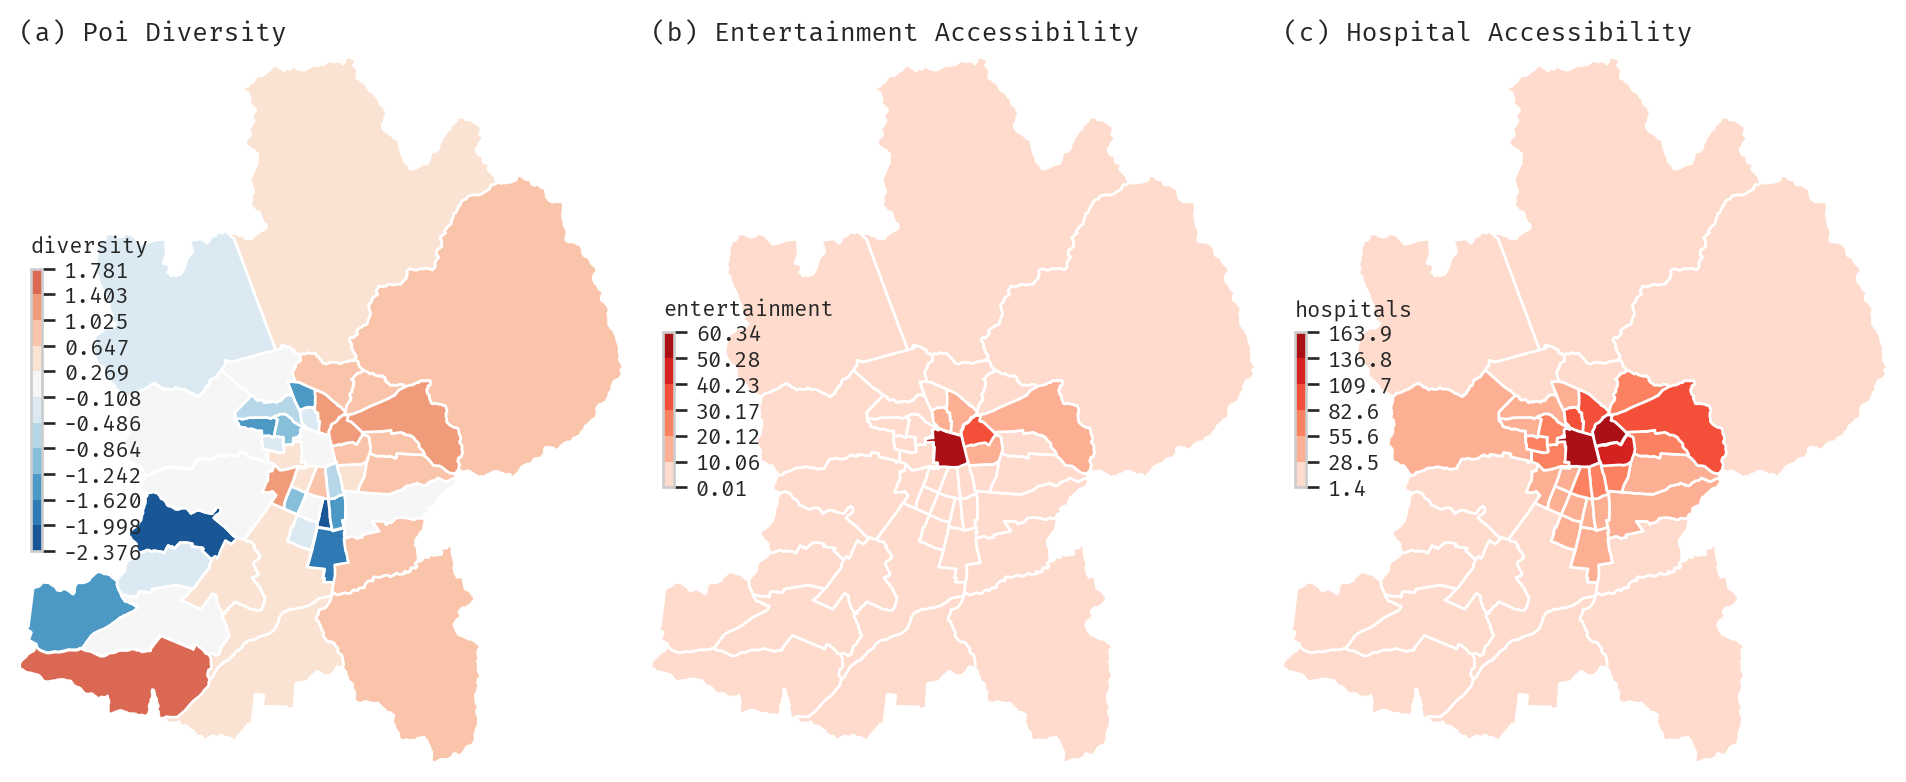

In [74]:
from aves.visualization.figures import figure_from_geodataframe
from aves.visualization.maps import choropleth_map
from aves.visualization.figures import small_multiples_from_geodataframe



comunas_entropy = (
    cat_pois_comunas.groupby(["index_right", "taxonomy"])
    .size()
    .unstack(fill_value=0)
    .apply(entropy, axis=1)
    .rename("poi_diversity")
    .to_frame()
    .pipe(standardize_columns)
    
    
)


plots_to_create = [
    ("(a) Poi Diversity", comunas_urbanas.join(comunas_entropy), "poi_diversity","diversity",11,"40%","2%"),
    ("(b) Entertainment Accessibility", communes_gdf, "entertainment_accsesability","entertainment",6,"22%","2%"),
    ("(c) Hospital Accessibility", communes_gdf, "hospital_accsesability","hospitals",6,"22%","2%"),
    
]



fig, axes = small_multiples_from_geodataframe(communes_gdf,3, height=4, col_wrap=3)


for ax, (title, gdf, col,labels,bins,height,width) in zip(axes, plots_to_create):
    choropleth_map(ax, gdf, col, linewidth=1, k=bins,scheme="quantiles",cbar_args=dict(
        label=labels,
        height=height,
        width=width,
        orientation="vertical",
        location="center left",
        label_size="small",
        bbox_to_anchor=(0.0, 0.0, 0.9, 1.0),
        
    ),)
    ax.set_title(title, loc='left',size="medium")

fig.tight_layout()
plt.show()

In [109]:
comunas_urbanas

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,SHAPE_Leng,SHAPE_Area,geometry,NombreComuna
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,0.884164,0.021166,"POLYGON ((-70.63192 -33.64634, -70.63207 -33.6...",Buin
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,0.720176,0.019124,"POLYGON ((-70.78914 -33.36153, -70.78824 -33.3...",Pudahuel
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,0.170180,0.001076,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...",Cerro Navia
4,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,1.692007,0.093820,"POLYGON ((-70.59630 -32.95138, -70.59673 -32.9...",Colina
6,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,1.046716,0.043569,"POLYGON ((-70.79418 -33.17180, -70.79314 -33.1...",Lampa
7,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13107,0.326251,0.004350,"POLYGON ((-70.66312 -33.32923, -70.66276 -33.3...",Huechuraba
8,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13104,0.138248,0.001077,"POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...",Conchalí
11,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13112,0.259374,0.002958,"POLYGON ((-70.63212 -33.55817, -70.63204 -33.5...",La Pintana
12,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,0.152123,0.001391,"POLYGON ((-70.65469 -33.54858, -70.65469 -33.5...",El Bosque
13,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13106,0.190249,0.001392,"POLYGON ((-70.67958 -33.44384, -70.67958 -33.4...",Estación Central


In [31]:

communes_gdf['centroids'] = communes_gdf.centroid

/tmp/ipykernel_94093/3509532887.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  communes_gdf['centroids'] = communes_gdf.centroid


Text(0.5, 0.98, 'Accesibilidad a entretenimiento por comuna urbana de Santiago')

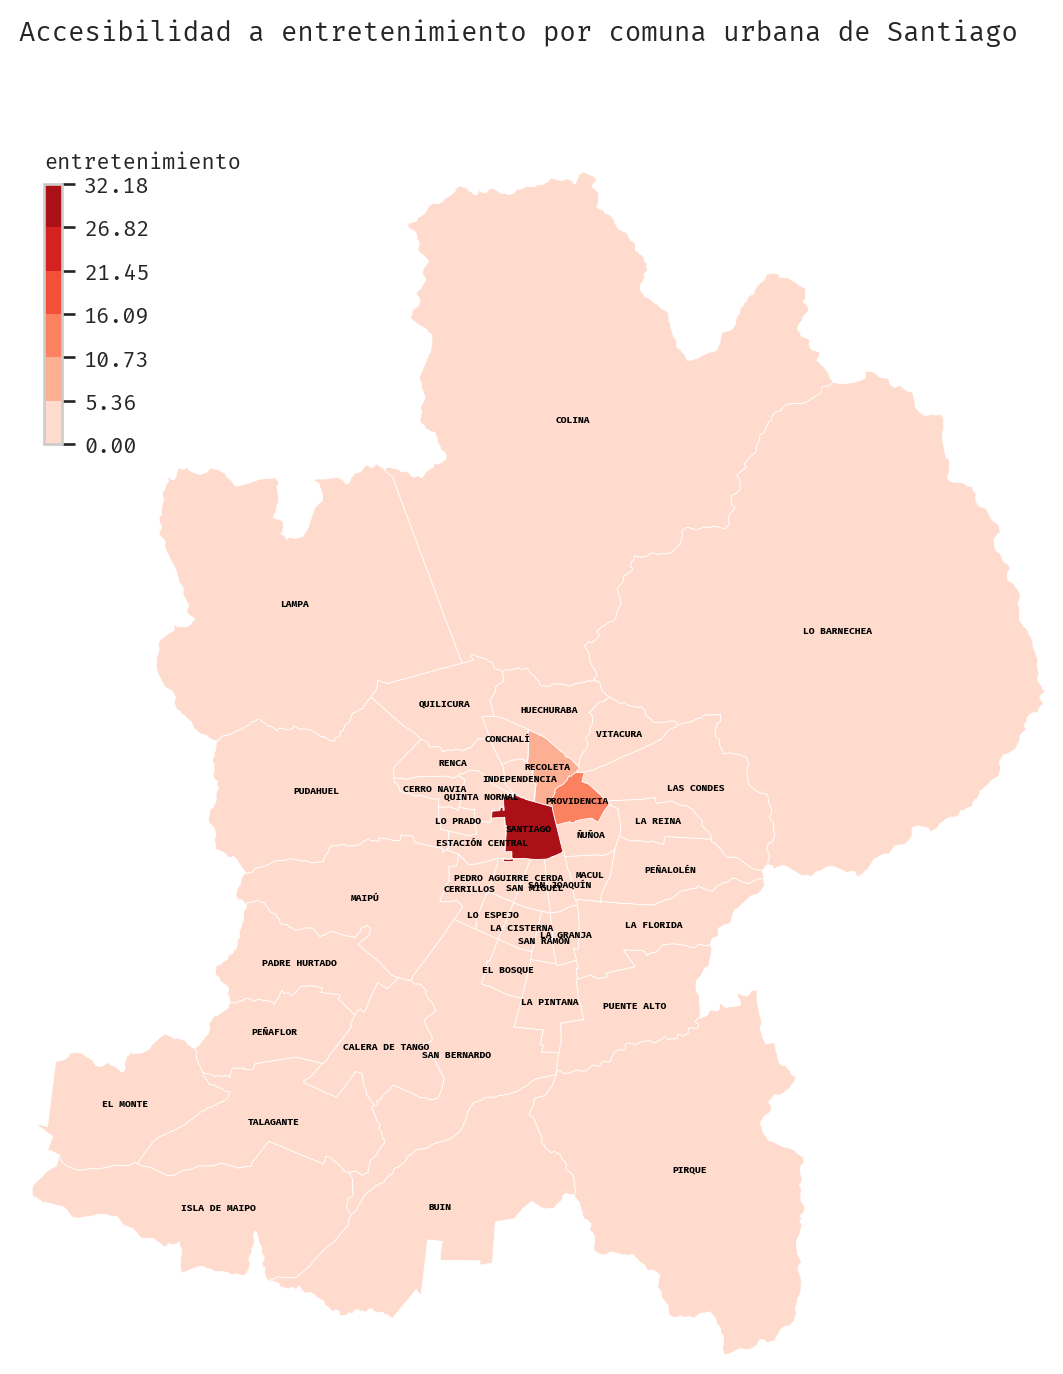

In [32]:

fig, ax = figure_from_geodataframe(comunas_urbanas, height=8)

choropleth_map(
    ax, communes_gdf, "entertainment_accsesability", edgecolor="white",linewidth=0.3, scheme="quantiles",k=6,cbar_args=dict(
        label="entretenimiento",
        height="22%",
        width="2%",
        orientation="vertical",
        location="upper left",
        label_size="small",
        bbox_to_anchor=(0.0, 0.0, 0.9, 1.0),
        
    ),
)


mpl.rcParams["font.family"] = "Fira Code"



#Add centroid labels
for idx, row in communes_gdf.iterrows():
    text = ax.text(row['centroids'].x, row['centroids'].y, row['NombreComuna'], 
                   ha='center', va='center', fontsize=3.5, fontweight='bold', color='black')
fig.suptitle('Accesibilidad a entretenimiento por comuna urbana de Santiago', fontsize=10)


Text(0.5, 0.98, 'Accesibilidad a hospitales de cada comuna urbana de Santiago')

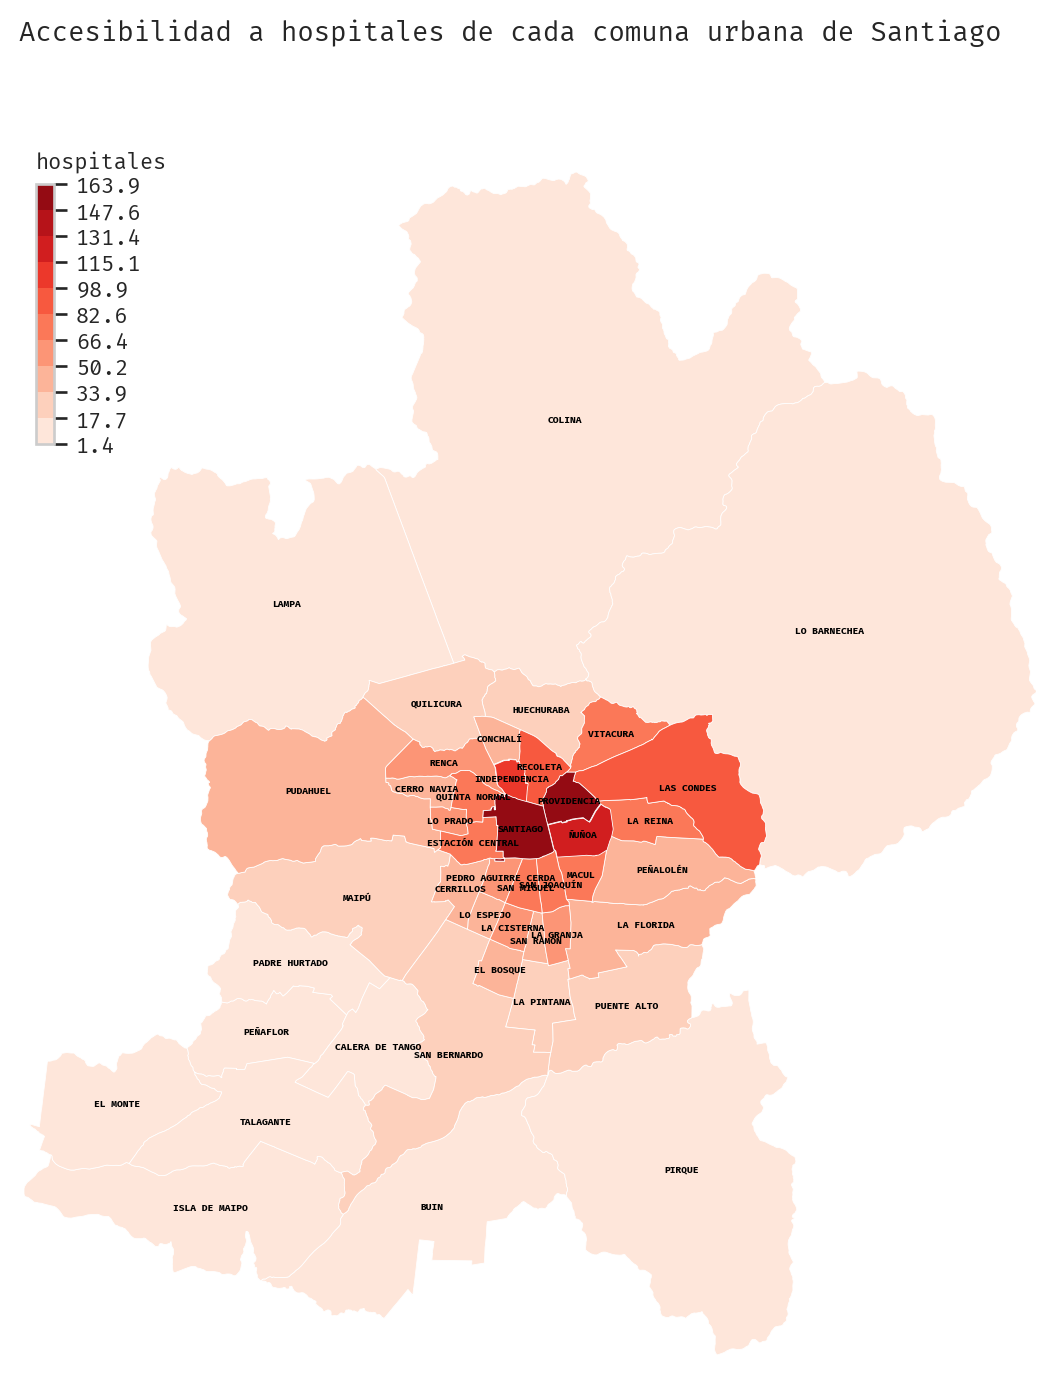

In [21]:
fig, ax = figure_from_geodataframe(comunas_urbanas, height=8)

choropleth_map(
    ax, communes_gdf, "hospital_accsesability", edgecolor="white",linewidth=0.3, scheme="quantiles",cbar_args=dict(
        label="hospitales",
        height="22%",
        width="2%",
        orientation="vertical",
        location="upper left",
        label_size="small",
        bbox_to_anchor=(0.0, 0.0, 0.9, 1.0),
        
    ),
)


mpl.rcParams["font.family"] = "Fira Code"



#Add centroid labels
for idx, row in communes_gdf.iterrows():
    text = ax.text(row['centroids'].x, row['centroids'].y, row['NombreComuna'], 
                   ha='center', va='center', fontsize=3.5, fontweight='bold', color='black')
fig.suptitle('Accesibilidad a hospitales de cada comuna urbana de Santiago', fontsize=10)